In [1]:
import os
import sys
spark_path = os.environ['SPARK_HOME']
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.9-src.zip")

import findspark
findspark.init()
import pyspark

In [2]:
number_cores = 2
memory_gb = 4
conf = (pyspark.SparkConf().setMaster('local[{}]'.format(number_cores)).set('spark.driver.memory', '{}g'.format(memory_gb)))
sc = pyspark.SparkContext(conf=conf)

In [3]:
bones_raw = sc.textFile("log/bones/")
bones_raw.count()

1972924

In [4]:
coyote_raw = sc.textFile("log/coyote/")
roadrunner_raw = sc.textFile("log/roadrunner/")
submitty_raw = sc.textFile("log/submitty/")
taz_raw = sc.textFile("log/taz/")

In [5]:
all_raw = sc.textFile("log/*")

In [6]:
bones_raw.count()+coyote_raw.count()+roadrunner_raw.count()+submitty_raw.count()+taz_raw.count()

5066232

### Total Counts for each dataset:

In [7]:
all_raw.count()

5066232

In [8]:
bones_raw.count()

1972924

In [9]:
coyote_raw.count()

58219

In [10]:
roadrunner_raw.count()

2081216

In [11]:
submitty_raw.count()

238393

In [12]:
taz_raw.count()

715480

In [13]:
all_raw.take(10000)

['Jan 18 06:25:05 bones sshd[29754]: Failed password for invalid user demo from 117.221.23.4 port 52370 ssh2',
 'Jan 18 06:25:06 bones sshd[29754]: Connection closed by 117.221.23.4 port 52370 [preauth]',
 'Jan 18 06:25:06 bones sshd[29892]: Invalid user MikroTik from 103.71.77.78',
 'Jan 18 06:25:06 bones sshd[29892]: input_userauth_request: invalid user MikroTik [preauth]',
 'Jan 18 06:25:07 bones sshd[29892]: pam_unix(sshd:auth): check pass; user unknown',
 'Jan 18 06:25:07 bones sshd[29892]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=103.71.77.78',
 'Jan 18 06:25:09 bones sshd[29892]: Failed password for invalid user MikroTik from 103.71.77.78 port 63238 ssh2',
 'Jan 18 06:25:09 bones sshd[29892]: Connection closed by 103.71.77.78 port 63238 [preauth]',
 'Jan 18 06:25:15 bones sshd[29894]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=81.70.233.94  user=root',
 'Jan 18 06:25:17 bones sshd[29894]:

In [14]:
bones_raw.take(10000)

['Jan 18 06:25:05 bones sshd[29754]: Failed password for invalid user demo from 117.221.23.4 port 52370 ssh2',
 'Jan 18 06:25:06 bones sshd[29754]: Connection closed by 117.221.23.4 port 52370 [preauth]',
 'Jan 18 06:25:06 bones sshd[29892]: Invalid user MikroTik from 103.71.77.78',
 'Jan 18 06:25:06 bones sshd[29892]: input_userauth_request: invalid user MikroTik [preauth]',
 'Jan 18 06:25:07 bones sshd[29892]: pam_unix(sshd:auth): check pass; user unknown',
 'Jan 18 06:25:07 bones sshd[29892]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=103.71.77.78',
 'Jan 18 06:25:09 bones sshd[29892]: Failed password for invalid user MikroTik from 103.71.77.78 port 63238 ssh2',
 'Jan 18 06:25:09 bones sshd[29892]: Connection closed by 103.71.77.78 port 63238 [preauth]',
 'Jan 18 06:25:15 bones sshd[29894]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=81.70.233.94  user=root',
 'Jan 18 06:25:17 bones sshd[29894]:

Check on process ID's with invalid user but no auth failure

In [15]:
coyote_raw.take(50)

['Jan 18 06:25:07 coyote CRON[7423]: pam_unix(cron:session): session closed for user root',
 'Jan 18 06:30:01 coyote CRON[7684]: pam_unix(cron:session): session opened for user root by (uid=0)',
 'Jan 18 06:30:01 coyote CRON[7684]: pam_unix(cron:session): session closed for user root',
 'Jan 18 06:39:01 coyote CRON[7766]: pam_unix(cron:session): session opened for user root by (uid=0)',
 'Jan 18 06:39:01 coyote CRON[7766]: pam_unix(cron:session): session closed for user root',
 'Jan 18 06:40:01 coyote CRON[7825]: pam_unix(cron:session): session opened for user root by (uid=0)',
 'Jan 18 06:40:02 coyote CRON[7825]: pam_unix(cron:session): session closed for user root',
 'Jan 18 06:50:01 coyote CRON[7906]: pam_unix(cron:session): session opened for user root by (uid=0)',
 'Jan 18 06:50:01 coyote CRON[7906]: pam_unix(cron:session): session closed for user root',
 'Jan 18 07:00:01 coyote CRON[8103]: pam_unix(cron:session): session opened for user root by (uid=0)',
 'Jan 18 07:00:02 coyote 

In [16]:
roadrunner_raw.take(50)

['Jan 18 00:09:14 roadrunner sshd[6220]: Invalid user admin from 116.74.89.29 port 50835',
 'Jan 18 00:09:14 roadrunner sshd[6189]: Invalid user git from 134.209.144.106 port 33728',
 'Jan 18 00:09:14 roadrunner sshd[6189]: pam_unix(sshd:auth): check pass; user unknown',
 'Jan 18 00:09:14 roadrunner sshd[6189]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=134.209.144.106',
 'Jan 18 00:09:14 roadrunner sshd[6220]: pam_unix(sshd:auth): check pass; user unknown',
 'Jan 18 00:09:14 roadrunner sshd[6220]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=116.74.89.29',
 'Jan 18 00:09:15 roadrunner sshd[6189]: Failed password for invalid user git from 134.209.144.106 port 33728 ssh2',
 'Jan 18 00:09:16 roadrunner sshd[6189]: Received disconnect from 134.209.144.106 port 33728:11: Bye Bye [preauth]',
 'Jan 18 00:09:16 roadrunner sshd[6189]: Disconnected from invalid user git 134.209.144.106 port 33728 [preauth]',

In [17]:
submitty_raw.take(50)

['Jan 17 00:06:01 submitty CRON[27240]: pam_unix(cron:session): session opened for user submitty_daemon by (uid=0)',
 'Jan 17 00:06:02 submitty CRON[27240]: pam_unix(cron:session): session closed for user submitty_daemon',
 'Jan 17 00:06:24 submitty sshd[27245]: Did not receive identification string from 124.207.29.72 port 37531',
 'Jan 17 00:06:57 submitty sshd[27258]: Invalid user admin from 51.77.112.168 port 37466',
 'Jan 17 00:06:57 submitty sshd[27258]: pam_unix(sshd:auth): check pass; user unknown',
 'Jan 17 00:06:57 submitty sshd[27258]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=51.77.112.168',
 'Jan 17 00:06:59 submitty sshd[27258]: Failed password for invalid user admin from 51.77.112.168 port 37466 ssh2',
 'Jan 17 00:07:01 submitty CRON[27266]: pam_unix(cron:session): session opened for user submitty_daemon by (uid=0)',
 'Jan 17 00:07:01 submitty CRON[27266]: pam_unix(cron:session): session closed for user submitty_daemon',
 'Jan

In [18]:
taz_raw.take(50)

['Dec 13 06:25:05 taz CRON[13752]: pam_unix(cron:session): session closed for user root',
 'Dec 13 06:25:17 taz sshd[13959]: Invalid user markus from 134.209.228.253',
 'Dec 13 06:25:17 taz sshd[13959]: input_userauth_request: invalid user markus [preauth]',
 'Dec 13 06:25:17 taz sshd[13959]: pam_unix(sshd:auth): check pass; user unknown',
 'Dec 13 06:25:17 taz sshd[13959]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=134.209.228.253',
 'Dec 13 06:25:19 taz sshd[13959]: Failed password for invalid user markus from 134.209.228.253 port 52638 ssh2',
 'Dec 13 06:26:16 taz sshd[13994]: Received disconnect from 112.85.42.119 port 28426:11:  [preauth]',
 'Dec 13 06:26:16 taz sshd[13994]: Disconnected from 112.85.42.119 port 28426 [preauth]',
 'Dec 13 06:26:39 taz sshd[14031]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=221.181.185.19  user=root',
 'Dec 13 06:26:41 taz sshd[14031]: Failed password for root 

In [19]:
all_raw.take(50)

['Jan 18 06:25:05 bones sshd[29754]: Failed password for invalid user demo from 117.221.23.4 port 52370 ssh2',
 'Jan 18 06:25:06 bones sshd[29754]: Connection closed by 117.221.23.4 port 52370 [preauth]',
 'Jan 18 06:25:06 bones sshd[29892]: Invalid user MikroTik from 103.71.77.78',
 'Jan 18 06:25:06 bones sshd[29892]: input_userauth_request: invalid user MikroTik [preauth]',
 'Jan 18 06:25:07 bones sshd[29892]: pam_unix(sshd:auth): check pass; user unknown',
 'Jan 18 06:25:07 bones sshd[29892]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=103.71.77.78',
 'Jan 18 06:25:09 bones sshd[29892]: Failed password for invalid user MikroTik from 103.71.77.78 port 63238 ssh2',
 'Jan 18 06:25:09 bones sshd[29892]: Connection closed by 103.71.77.78 port 63238 [preauth]',
 'Jan 18 06:25:15 bones sshd[29894]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=81.70.233.94  user=root',
 'Jan 18 06:25:17 bones sshd[29894]:

#### Method for splitting lines into fields

In [20]:
test1 = 'Jan 18 06:25:30 bones sshd[29915]: '+ \
'Invalid user MikroTik from 103.71.77.78'

step1 = test1.split("]: ")
print(step1)
step2 = step1[0].rsplit(" ", 2)
print(step2)
month = step2[0].split(" ")[0]
day = step2[0].split(" ")[1]
time = step2[0].split(" ")[2]
step3 = step2[2].split("[")
print(step3)
server = step2[1]
processType = step3[0]
processID = step3[1]
message = step1[1]


['Jan 18 06:25:30 bones sshd[29915', 'Invalid user MikroTik from 103.71.77.78']
['Jan 18 06:25:30', 'bones', 'sshd[29915']
['sshd', '29915']


### Divide logs by process type

In [21]:
#mon dd hh:mm:ss <servername> <sshd/CRON>[processID]: message
#OR
#mon dd hh:mm:ss <servername> <sudo/systemd>: message
def firstSplit(line):
    return line.split(None,4)


In [22]:
firstSplitLogs = all_raw.map(lambda line: firstSplit(line))
firstSplitLogs.take(20)

[['Jan',
  '18',
  '06:25:05',
  'bones',
  'sshd[29754]: Failed password for invalid user demo from 117.221.23.4 port 52370 ssh2'],
 ['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29754]: Connection closed by 117.221.23.4 port 52370 [preauth]'],
 ['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29892]: Invalid user MikroTik from 103.71.77.78'],
 ['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29892]: input_userauth_request: invalid user MikroTik [preauth]'],
 ['Jan',
  '18',
  '06:25:07',
  'bones',
  'sshd[29892]: pam_unix(sshd:auth): check pass; user unknown'],
 ['Jan',
  '18',
  '06:25:07',
  'bones',
  'sshd[29892]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=103.71.77.78'],
 ['Jan',
  '18',
  '06:25:09',
  'bones',
  'sshd[29892]: Failed password for invalid user MikroTik from 103.71.77.78 port 63238 ssh2'],
 ['Jan',
  '18',
  '06:25:09',
  'bones',
  'sshd[29892]: Connection closed by 103.71.77.78 port 63238 [preauth]'],
 ['Jan',
  

In [23]:
temp = firstSplitLogs.collect()

In [24]:
firstSplitLogs.count()

5066232

# Survey and analysis of process types

### First four characters of each process type

In [25]:
processTypes = []
for x in temp:
    start = x[4][0:4]
    if start not in processTypes:
        processTypes.append(start)
print(processTypes)

['sshd', 'CRON', 'syst', 'sudo', 'cron', 'pure', 'su[1', 'vsft', 'dbus']


#### Group messages into types by first word of message

In [26]:
def uniqueMessages(log):
    messageTypes = []
    for x in log:
        start = x[4].split("]: ", 1)[1].split(" ")[0]
        if start not in messageTypes:
            messageTypes.append(start)
    return messageTypes

### sshd

Total entries from all server logs: 4924508 (97.2%)

**sshd - Secure Shell Server Daemon**  
From [ssh.com](https://www.ssh.com/ssh/sshd/): "sshd is the OpenSSH server process. It listens to incoming connections using the [SSH](https://www.ssh.com/ssh/protocol/) protocol and acts as the server for the protocol. It handles user authentication, encryption, terminal connections, file transfers, and tunneling."

Authetication Failures: http://theory.uchicago.edu/~smaria/adam_ssh/SSH%20Secure%20Shell/documentation/Authentication_Failure.html#:~:text=This%20error%20message%20indicates%20that,user%20name%20may%20be%20incorrect.


In [27]:
sshd = firstSplitLogs.filter(lambda line: line[4][0:4]=="sshd")
sshd.count()

4924508

#### check for sshd variants - all appear to take form of sshd[\d+]

In [28]:
sshd_check = sshd.filter(lambda line: line[4][0:5]=="sshd[")
sshd_check.count()

4924508

In [29]:
import re
regex = re.compile(r'sshd\[\d+\]')
sshd_check2 = sshd.filter(lambda line: len(regex.findall(line[4]))==1)
sshd_check2.count()

4924508

In [30]:
sshd.take(5)

[['Jan',
  '18',
  '06:25:05',
  'bones',
  'sshd[29754]: Failed password for invalid user demo from 117.221.23.4 port 52370 ssh2'],
 ['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29754]: Connection closed by 117.221.23.4 port 52370 [preauth]'],
 ['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29892]: Invalid user MikroTik from 103.71.77.78'],
 ['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29892]: input_userauth_request: invalid user MikroTik [preauth]'],
 ['Jan',
  '18',
  '06:25:07',
  'bones',
  'sshd[29892]: pam_unix(sshd:auth): check pass; user unknown']]

In [31]:
sshdtemp = sshd.collect()
sshdtemp

[['Jan',
  '18',
  '06:25:05',
  'bones',
  'sshd[29754]: Failed password for invalid user demo from 117.221.23.4 port 52370 ssh2'],
 ['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29754]: Connection closed by 117.221.23.4 port 52370 [preauth]'],
 ['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29892]: Invalid user MikroTik from 103.71.77.78'],
 ['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29892]: input_userauth_request: invalid user MikroTik [preauth]'],
 ['Jan',
  '18',
  '06:25:07',
  'bones',
  'sshd[29892]: pam_unix(sshd:auth): check pass; user unknown'],
 ['Jan',
  '18',
  '06:25:07',
  'bones',
  'sshd[29892]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=103.71.77.78'],
 ['Jan',
  '18',
  '06:25:09',
  'bones',
  'sshd[29892]: Failed password for invalid user MikroTik from 103.71.77.78 port 63238 ssh2'],
 ['Jan',
  '18',
  '06:25:09',
  'bones',
  'sshd[29892]: Connection closed by 103.71.77.78 port 63238 [preauth]'],
 ['Jan',
  

#### First words of messagges for sshd:

In [32]:
print(uniqueMessages(sshdtemp))

['Failed', 'Connection', 'Invalid', 'input_userauth_request:', 'pam_unix(sshd:auth):', 'Received', 'Disconnected', 'Accepted', 'pam_unix(sshd:session):', 'message', 'PAM', 'error:', 'Disconnecting:', 'pam_ldap:', 'Did', 'Protocol', 'fatal:', 'Bad', 'userauth_pubkey:', 'Disconnecting', 'Unable', 'ssh_dispatch_run_fatal:', 'warning:', 'Could', 'syslogin_perform_logout:', 'pam_systemd(sshd:session):', 'invalid']


#### Confirm that the message types below cover all for sshd

In [33]:
# failed = re.compile(r'Failed password for invalid user')
# closed = re.compile(r'Connection closed') 
# invalid = re.compile(r'invalid user w+ from \d+\.\d+\.\d+\.\d+')
# ivalid_userauth = re.compile(r'invalid user w+ \[preauth\]')
# check_pass = re.compile(r'pam_unix(sshd:auth): check pass; user unknown')
# authfailure = re.compile('authentication failure; logname=.* uid=.* euid=.* tty=.* ruser=.* rhost=\d+.\d+.\d+.\d+')
# recieved_disconnnect = re.compile(r'Received disconnect from')
# Disconnected = re.compile(r'Disconencted from \d+\.\d+\.\d+\.\d+')
# Accepted = re.compile(r'Accepted')
# opened = re.compile(r'session opened')
# closed = re.compile(r'session closed')
# message = re.compile(r'message')
# PAM = re.compile(r'PAM')
# error = re.compile(r'error:')


# mtypes = [opened, closed, command, authfailure, invaliduser, password]
# unknowns = []
# for l in sshdtemp:
#     count =0
#     for m in mtypes:
#         if len(m.findall(l[4]))>0:
#             count+=1
#     if count == 0:
#         #add messages to unknowns if they don't match known message patterns
#         unknowns.append(l[4])
# print(unknowns) 


# #started this approach but looks impractical for sshd due to the sheer number and diversity
# # of messages

### Inspecting sshd message types

In [34]:
sshd_failed = sshd.filter(lambda l: l[4].split(None)[1] == 'Failed')
sshd_failed.count()

1140027

In [35]:
sshd_failed.take(100)

[['Jan',
  '18',
  '06:25:05',
  'bones',
  'sshd[29754]: Failed password for invalid user demo from 117.221.23.4 port 52370 ssh2'],
 ['Jan',
  '18',
  '06:25:09',
  'bones',
  'sshd[29892]: Failed password for invalid user MikroTik from 103.71.77.78 port 63238 ssh2'],
 ['Jan',
  '18',
  '06:25:17',
  'bones',
  'sshd[29894]: Failed password for root from 81.70.233.94 port 42634 ssh2'],
 ['Jan',
  '18',
  '06:25:21',
  'bones',
  'sshd[29896]: Failed password for invalid user MikroTik from 103.71.77.78 port 63461 ssh2'],
 ['Jan',
  '18',
  '06:25:21',
  'bones',
  'sshd[29898]: Failed password for root from 200.46.252.35 port 52084 ssh2'],
 ['Jan',
  '18',
  '06:25:27',
  'bones',
  'sshd[29901]: Failed password for invalid user sandeep from 180.175.225.180 port 44860 ssh2'],
 ['Jan',
  '18',
  '06:25:29',
  'bones',
  'sshd[29910]: Failed password for invalid user carla from 42.159.80.91 port 1344 ssh2'],
 ['Jan',
  '18',
  '06:25:30',
  'bones',
  'sshd[29912]: Failed password for ro

In [36]:
sshd_connection = sshd.filter(lambda l: l[4].split(None)[1] == 'Connection')
sshd_connection.count()

146886

In [37]:
sshd_connection.take(100)

[['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29754]: Connection closed by 117.221.23.4 port 52370 [preauth]'],
 ['Jan',
  '18',
  '06:25:09',
  'bones',
  'sshd[29892]: Connection closed by 103.71.77.78 port 63238 [preauth]'],
 ['Jan',
  '18',
  '06:25:22',
  'bones',
  'sshd[29896]: Connection closed by 103.71.77.78 port 63461 [preauth]'],
 ['Jan',
  '18',
  '06:25:34',
  'bones',
  'sshd[29915]: Connection closed by 103.71.77.78 port 63740 [preauth]'],
 ['Jan',
  '18',
  '06:25:46',
  'bones',
  'sshd[29930]: Connection closed by 103.71.77.78 port 63996 [preauth]'],
 ['Jan',
  '18',
  '06:25:56',
  'bones',
  'sshd[29936]: Connection closed by 103.71.77.78 port 64227 [preauth]'],
 ['Jan',
  '18',
  '06:26:00',
  'bones',
  'sshd[29900]: Connection closed by 117.221.23.4 port 61708 [preauth]'],
 ['Jan',
  '18',
  '06:26:08',
  'bones',
  'sshd[29962]: Connection closed by 103.71.77.78 port 64454 [preauth]'],
 ['Jan',
  '18',
  '06:26:22',
  'bones',
  'sshd[29979]: Connection clo

In [38]:
sshd_inputuserauth = sshd.filter(lambda l: l[4].split(None)[1] == 'input_userauth_request:')
sshd_inputuserauth.count()

222365

In [39]:
sshd_inputuserauth.take(100)

[['Jan',
  '18',
  '06:25:06',
  'bones',
  'sshd[29892]: input_userauth_request: invalid user MikroTik [preauth]'],
 ['Jan',
  '18',
  '06:25:18',
  'bones',
  'sshd[29896]: input_userauth_request: invalid user MikroTik [preauth]'],
 ['Jan',
  '18',
  '06:25:26',
  'bones',
  'sshd[29901]: input_userauth_request: invalid user sandeep [preauth]'],
 ['Jan',
  '18',
  '06:25:27',
  'bones',
  'sshd[29910]: input_userauth_request: invalid user carla [preauth]'],
 ['Jan',
  '18',
  '06:25:30',
  'bones',
  'sshd[29915]: input_userauth_request: invalid user MikroTik [preauth]'],
 ['Jan',
  '18',
  '06:25:34',
  'bones',
  'sshd[29918]: input_userauth_request: invalid user noc [preauth]'],
 ['Jan',
  '18',
  '06:25:44',
  'bones',
  'sshd[29930]: input_userauth_request: invalid user MikroTik [preauth]'],
 ['Jan',
  '18',
  '06:25:44',
  'bones',
  'sshd[29900]: input_userauth_request: invalid user telecomadmin [preauth]'],
 ['Jan',
  '18',
  '06:25:53',
  'bones',
  'sshd[29936]: input_usera

In [40]:
sshd_pam_unixsshdauth = sshd.filter(lambda l: l[4].split(None)[1] == 'pam_unix(sshd:auth):')
sshd_pam_unixsshdauth.count()

1352797

In [41]:
sshd_pam_unixsshdauth.take(100)

[['Jan',
  '18',
  '06:25:07',
  'bones',
  'sshd[29892]: pam_unix(sshd:auth): check pass; user unknown'],
 ['Jan',
  '18',
  '06:25:07',
  'bones',
  'sshd[29892]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=103.71.77.78'],
 ['Jan',
  '18',
  '06:25:15',
  'bones',
  'sshd[29894]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=81.70.233.94  user=root'],
 ['Jan',
  '18',
  '06:25:18',
  'bones',
  'sshd[29896]: pam_unix(sshd:auth): check pass; user unknown'],
 ['Jan',
  '18',
  '06:25:18',
  'bones',
  'sshd[29896]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=103.71.77.78'],
 ['Jan',
  '18',
  '06:25:20',
  'bones',
  'sshd[29898]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=200.46.252.35  user=root'],
 ['Jan',
  '18',
  '06:25:26',
  'bones',
  'sshd[29901]: pam_unix(sshd:auth): check pass; user unknown'],
 ['Jan',

In [42]:
sshd_received = sshd.filter(lambda l: l[4].split(None)[1] == 'Received')
sshd_received.count()

626545

In [43]:
sshd_received.take(100)

[['Jan',
  '18',
  '06:25:17',
  'bones',
  'sshd[29894]: Received disconnect from 81.70.233.94 port 42634:11: Bye Bye [preauth]'],
 ['Jan',
  '18',
  '06:25:21',
  'bones',
  'sshd[29898]: Received disconnect from 200.46.252.35 port 52084:11: Bye Bye [preauth]'],
 ['Jan',
  '18',
  '06:25:28',
  'bones',
  'sshd[29901]: Received disconnect from 180.175.225.180 port 44860:11: Bye Bye [preauth]'],
 ['Jan',
  '18',
  '06:25:29',
  'bones',
  'sshd[29910]: Received disconnect from 42.159.80.91 port 1344:11: Bye Bye [preauth]'],
 ['Jan',
  '18',
  '06:25:30',
  'bones',
  'sshd[29912]: Received disconnect from 220.180.192.152 port 35708:11: Bye Bye [preauth]'],
 ['Jan',
  '18',
  '06:25:36',
  'bones',
  'sshd[29918]: Received disconnect from 83.221.210.233 port 51852:11: Bye Bye [preauth]'],
 ['Jan',
  '18',
  '06:25:58',
  'bones',
  'sshd[29938]: Received disconnect from 106.54.98.89 port 35044:11: Bye Bye [preauth]'],
 ['Jan',
  '18',
  '06:26:10',
  'bones',
  'sshd[29946]: Received d

In [44]:
sshd_disconnected = sshd.filter(lambda l: l[4].split(None)[1] == 'Disconnected')
sshd_disconnected.count()

626546

In [45]:
sshd_disconnected.take(100)

[['Jan',
  '18',
  '06:25:17',
  'bones',
  'sshd[29894]: Disconnected from 81.70.233.94 port 42634 [preauth]'],
 ['Jan',
  '18',
  '06:25:21',
  'bones',
  'sshd[29898]: Disconnected from 200.46.252.35 port 52084 [preauth]'],
 ['Jan',
  '18',
  '06:25:28',
  'bones',
  'sshd[29901]: Disconnected from 180.175.225.180 port 44860 [preauth]'],
 ['Jan',
  '18',
  '06:25:29',
  'bones',
  'sshd[29910]: Disconnected from 42.159.80.91 port 1344 [preauth]'],
 ['Jan',
  '18',
  '06:25:30',
  'bones',
  'sshd[29912]: Disconnected from 220.180.192.152 port 35708 [preauth]'],
 ['Jan',
  '18',
  '06:25:36',
  'bones',
  'sshd[29918]: Disconnected from 83.221.210.233 port 51852 [preauth]'],
 ['Jan',
  '18',
  '06:25:58',
  'bones',
  'sshd[29938]: Disconnected from 106.54.98.89 port 35044 [preauth]'],
 ['Jan',
  '18',
  '06:26:10',
  'bones',
  'sshd[29946]: Disconnected from 122.248.182.130 port 39208 [preauth]'],
 ['Jan',
  '18',
  '06:26:10',
  'bones',
  'sshd[29969]: Disconnected from 128.199.2

In [46]:
sshd_accepted = sshd.filter(lambda l: l[4].split(None)[1] == 'Accepted')
sshd_accepted.count()

1778

In [47]:
sshd_accepted.take(100)

[['Jan',
  '18',
  '06:30:01',
  'bones',
  'sshd[30160]: Accepted publickey for root from 2605:0:103:200:144:26:62:134 port 55770 ssh2: RSA SHA256:IrZcuRBPPd5/RVek50rXiIqWeisZP/i0+PXtbxAJYME'],
 ['Jan',
  '18',
  '06:30:02',
  'bones',
  'sshd[30303]: Accepted publickey for root from 2605:0:103:200:144:26:62:134 port 55774 ssh2: RSA SHA256:IrZcuRBPPd5/RVek50rXiIqWeisZP/i0+PXtbxAJYME'],
 ['Jan',
  '18',
  '06:30:11',
  'bones',
  'sshd[30437]: Accepted publickey for root from 2605:0:103:200:144:26:62:134 port 55778 ssh2: RSA SHA256:IrZcuRBPPd5/RVek50rXiIqWeisZP/i0+PXtbxAJYME'],
 ['Jan',
  '18',
  '06:30:12',
  'bones',
  'sshd[30551]: Accepted publickey for root from 2605:0:103:200:144:26:62:134 port 55780 ssh2: RSA SHA256:IrZcuRBPPd5/RVek50rXiIqWeisZP/i0+PXtbxAJYME'],
 ['Jan',
  '18',
  '06:30:12',
  'bones',
  'sshd[30651]: Accepted publickey for root from 2605:0:103:200:144:26:62:134 port 55782 ssh2: RSA SHA256:IrZcuRBPPd5/RVek50rXiIqWeisZP/i0+PXtbxAJYME'],
 ['Jan',
  '18',
  '06:30

In [48]:
sshd_unixsession = sshd.filter(lambda l: l[4].split(None)[1] == 'pam_unix(sshd:session):') 
sshd_unixsession.count()

3544

In [49]:
sshd_unixsession.take(100)

[['Jan',
  '18',
  '06:30:01',
  'bones',
  'sshd[30160]: pam_unix(sshd:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '06:30:02',
  'bones',
  'sshd[30160]: pam_unix(sshd:session): session closed for user root'],
 ['Jan',
  '18',
  '06:30:02',
  'bones',
  'sshd[30303]: pam_unix(sshd:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '06:30:11',
  'bones',
  'sshd[30303]: pam_unix(sshd:session): session closed for user root'],
 ['Jan',
  '18',
  '06:30:11',
  'bones',
  'sshd[30437]: pam_unix(sshd:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '06:30:11',
  'bones',
  'sshd[30437]: pam_unix(sshd:session): session closed for user root'],
 ['Jan',
  '18',
  '06:30:12',
  'bones',
  'sshd[30551]: pam_unix(sshd:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '06:30:12',
  'bones',
  'sshd[30551]: pam_unix(sshd:session): session closed for user root'],
 ['Jan',
  '18',
  '06:30:12',
  'bones',
  

In [50]:
sshd_message = sshd.filter(lambda l: l[4].split(None)[1] == 'message') 
sshd_message.count()

69702

In [51]:
sshd_message.take(100)

[['Jan',
  '18',
  '06:33:25',
  'bones',
  'sshd[31274]: message repeated 2 times: [ Failed password for root from 222.187.222.55 port 34389 ssh2]'],
 ['Jan',
  '18',
  '06:37:30',
  'bones',
  'sshd[31456]: message repeated 2 times: [ Failed password for root from 112.85.42.227 port 35268 ssh2]'],
 ['Jan',
  '18',
  '06:41:17',
  'bones',
  'sshd[31651]: message repeated 2 times: [ Failed password for root from 218.92.0.248 port 2410 ssh2]'],
 ['Jan',
  '18',
  '06:42:16',
  'bones',
  'sshd[31687]: message repeated 2 times: [ Failed password for root from 221.181.185.148 port 19364 ssh2]'],
 ['Jan',
  '18',
  '06:44:48',
  'bones',
  'sshd[31776]: message repeated 2 times: [ Failed password for root from 112.85.42.180 port 43444 ssh2]'],
 ['Jan',
  '18',
  '06:55:24',
  'bones',
  'sshd[32150]: message repeated 2 times: [ Failed password for root from 112.85.42.172 port 43213 ssh2]'],
 ['Jan',
  '18',
  '07:18:48',
  'bones',
  'sshd[802]: message repeated 2 times: [ Failed password

In [52]:
sshd_PAM = sshd.filter(lambda l: l[4].split(None)[1] == 'PAM') 
sshd_PAM.count()

201516

In [53]:
sshd_PAM.take(100)

[['Jan',
  '18',
  '06:33:25',
  'bones',
  'sshd[31274]: PAM 2 more authentication failures; logname= uid=0 euid=0 tty=ssh ruser= rhost=222.187.222.55  user=root'],
 ['Jan',
  '18',
  '06:33:36',
  'bones',
  'sshd[31277]: PAM 2 more authentication failures; logname= uid=0 euid=0 tty=ssh ruser= rhost=222.187.222.55  user=root'],
 ['Jan',
  '18',
  '06:33:46',
  'bones',
  'sshd[31292]: PAM 2 more authentication failures; logname= uid=0 euid=0 tty=ssh ruser= rhost=222.187.222.55  user=root'],
 ['Jan',
  '18',
  '06:34:09',
  'bones',
  'sshd[31306]: PAM 4 more authentication failures; logname= uid=0 euid=0 tty=ssh ruser= rhost=218.92.0.248  user=root'],
 ['Jan',
  '18',
  '06:34:09',
  'bones',
  'sshd[31306]: PAM service(sshd) ignoring max retries; 5 > 3'],
 ['Jan',
  '18',
  '06:34:38',
  'bones',
  'sshd[31336]: PAM 5 more authentication failures; logname= uid=0 euid=0 tty=ssh ruser= rhost=218.92.0.248  user=root'],
 ['Jan',
  '18',
  '06:34:38',
  'bones',
  'sshd[31336]: PAM servi

In [54]:
sshd_error = sshd.filter(lambda l: l[4].split(None)[1] == 'error:') 
sshd_error.count()

47607

In [55]:
sshd_error.take(100)

[['Jan',
  '18',
  '06:34:09',
  'bones',
  'sshd[31306]: error: maximum authentication attempts exceeded for root from 218.92.0.248 port 26810 ssh2 [preauth]'],
 ['Jan',
  '18',
  '06:34:38',
  'bones',
  'sshd[31336]: error: maximum authentication attempts exceeded for root from 218.92.0.248 port 5390 ssh2 [preauth]'],
 ['Jan',
  '18',
  '06:41:03',
  'bones',
  'sshd[31639]: error: maximum authentication attempts exceeded for root from 218.92.0.248 port 36280 ssh2 [preauth]'],
 ['Jan',
  '18',
  '06:41:27',
  'bones',
  'sshd[31651]: error: maximum authentication attempts exceeded for root from 218.92.0.248 port 2410 ssh2 [preauth]'],
 ['Jan',
  '18',
  '06:44:55',
  'bones',
  'sshd[31776]: error: maximum authentication attempts exceeded for root from 112.85.42.180 port 43444 ssh2 [preauth]'],
 ['Jan',
  '18',
  '06:48:26',
  'bones',
  'sshd[31887]: error: maximum authentication attempts exceeded for root from 61.177.172.177 port 15043 ssh2 [preauth]'],
 ['Jan',
  '18',
  '06:48:4

In [56]:
sshd_disconnecting = sshd.filter(lambda l: l[4].split(None)[1] == 'Disconnecting:') 
sshd_disconnecting.count()

28971

In [57]:
sshd_disconnecting.take(100)

[['Jan',
  '18',
  '06:34:09',
  'bones',
  'sshd[31306]: Disconnecting: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '06:34:38',
  'bones',
  'sshd[31336]: Disconnecting: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '06:41:03',
  'bones',
  'sshd[31639]: Disconnecting: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '06:41:27',
  'bones',
  'sshd[31651]: Disconnecting: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '06:44:55',
  'bones',
  'sshd[31776]: Disconnecting: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '06:48:26',
  'bones',
  'sshd[31887]: Disconnecting: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '06:48:49',
  'bones',
  'sshd[31899]: Disconnecting: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '06:55:28',
  'bones',
  'sshd[32150]: Disconnecting: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '06:56:04',
  'bones',
  'ssh

In [58]:
sshd_pamldap = sshd.filter(lambda l: l[4].split(None)[1] == 'pam_ldap:') 
sshd_pamldap.count()

179

In [59]:
sshd_pamldap.take(100)

[['Jan',
  '18',
  '06:45:44',
  'bones',
  'sshd[31815]: pam_ldap: error trying to bind as user "uid=yang,ou=Faculty,ou=People,dc=cs" (Invalid credentials)'],
 ['Jan',
  '18',
  '15:41:40',
  'bones',
  'sshd[9824]: pam_ldap: error trying to bind as user "uid=yang,ou=Faculty,ou=People,dc=cs" (Invalid credentials)'],
 ['Jan',
  '19',
  '06:35:38',
  'bones',
  'sshd[4076]: pam_ldap: error trying to bind as user "uid=yang,ou=Faculty,ou=People,dc=cs" (Invalid credentials)'],
 ['Jan',
  '19',
  '18:26:56',
  'bones',
  'sshd[22604]: pam_ldap: error trying to bind as user "uid=yang,ou=Faculty,ou=People,dc=cs" (Invalid credentials)'],
 ['Jan',
  '19',
  '23:41:06',
  'bones',
  'sshd[30877]: pam_ldap: error trying to bind as user "uid=yang,ou=Faculty,ou=People,dc=cs" (Invalid credentials)'],
 ['Jan',
  '20',
  '04:56:57',
  'bones',
  'sshd[10055]: pam_ldap: error trying to bind as user "uid=yang,ou=Faculty,ou=People,dc=cs" (Invalid credentials)'],
 ['Jan',
  '20',
  '09:41:26',
  'bones',


In [60]:
sshd_did= sshd.filter(lambda l: l[4].split(None)[1] == 'Did') 
sshd_did.count()

6302

In [61]:
sshd_did.take(100)

[['Jan',
  '18',
  '07:27:00',
  'bones',
  'sshd[944]: Did not receive identification string from 61.177.172.107'],
 ['Jan',
  '18',
  '07:52:56',
  'bones',
  'sshd[1445]: Did not receive identification string from 65.0.54.173'],
 ['Jan',
  '18',
  '08:01:14',
  'bones',
  'sshd[1560]: Did not receive identification string from 206.189.133.196'],
 ['Jan',
  '18',
  '08:21:20',
  'bones',
  'sshd[1907]: Did not receive identification string from 112.85.42.184'],
 ['Jan',
  '18',
  '09:05:45',
  'bones',
  'sshd[2659]: Did not receive identification string from 123.26.206.62'],
 ['Jan',
  '18',
  '09:30:25',
  'bones',
  'sshd[3151]: Did not receive identification string from 139.59.11.101'],
 ['Jan',
  '18',
  '11:26:30',
  'bones',
  'sshd[5128]: Did not receive identification string from 61.177.172.177'],
 ['Jan',
  '18',
  '12:18:08',
  'bones',
  'sshd[5940]: Did not receive identification string from 68.183.18.137'],
 ['Jan',
  '18',
  '13:12:36',
  'bones',
  'sshd[6833]: Did no

In [62]:
sshd_protocol = sshd.filter(lambda l: l[4].split(None)[1] == 'Protocol') 
sshd_protocol.count()

26

In [63]:
sshd_protocol.collect()

[['Jan',
  '20',
  '01:19:21',
  'bones',
  'sshd[1174]: Protocol major versions differ for 139.162.247.102: SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.10 vs. SSH-1.5-Nmap-SSH1-Hostkey'],
 ['Jan',
  '21',
  '10:49:49',
  'bones',
  'sshd[2488]: Protocol major versions differ for 193.56.252.250: SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.10 vs. SSH-0.12-OpenVASVTSSH_1.0'],
 ['Jan',
  '21',
  '10:49:49',
  'bones',
  'sshd[2493]: Protocol major versions differ for 193.56.252.250: SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.10 vs. SSH-1.33-OpenVASVTSSH_1.0'],
 ['Jan',
  '21',
  '10:49:50',
  'bones',
  'sshd[2495]: Protocol major versions differ for 193.56.252.250: SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.10 vs. SSH-1.5-OpenVASVTSSH_1.0'],
 ['Jan',
  '6',
  '05:35:14',
  'bones',
  'sshd[25800]: Protocol major versions differ for 139.162.247.102: SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.10 vs. SSH-1.5-Nmap-SSH1-Hostkey'],
 ['Jan',
  '21',
  '15:17:23',
  'roadrunner',
  'sshd[24440]: Protocol major versions di

In [64]:
sshd_fatal = sshd.filter(lambda l: l[4].split(None)[1] == 'fatal:') 
sshd_fatal.count()

91

In [65]:
sshd_fatal.collect()

[['Jan',
  '20',
  '01:19:21',
  'bones',
  'sshd[1175]: fatal: Unable to negotiate with 139.162.247.102 port 21052: no matching host key type found. Their offer: ssh-dss [preauth]'],
 ['Jan',
  '20',
  '01:19:23',
  'bones',
  'sshd[1181]: fatal: Unable to negotiate with 139.162.247.102 port 24692: no matching host key type found. Their offer: ecdsa-sha2-nistp384 [preauth]'],
 ['Jan',
  '20',
  '01:19:23',
  'bones',
  'sshd[1183]: fatal: Unable to negotiate with 139.162.247.102 port 25658: no matching host key type found. Their offer: ecdsa-sha2-nistp521 [preauth]'],
 ['Jan',
  '22',
  '00:29:02',
  'bones',
  'sshd[24985]: fatal: Unable to negotiate with 44.242.165.232 port 45628: no matching host key type found. Their offer: ecdsa-sha2-nistp384 [preauth]'],
 ['Jan',
  '22',
  '00:29:04',
  'bones',
  'sshd[24987]: fatal: Unable to negotiate with 44.242.165.232 port 46042: no matching host key type found. Their offer: ecdsa-sha2-nistp521 [preauth]'],
 ['Jan',
  '22',
  '00:29:08',
 

In [66]:
sshd_bad = sshd.filter(lambda l: l[4].split(None)[1] == 'Bad') 
sshd_bad.count()

98

In [67]:
sshd_bad.collect()

[['Jan',
  '20',
  '06:19:15',
  'bones',
  "sshd[13171]: Bad protocol version identification '\\272\\253d\\241EZC\\333M\\207\\356^\\375\\277\\0259 X\\324>\\022\\230\\304<\\340\\023\\317' from 172.105.89.161 port 47605"],
 ['Jan',
  '21',
  '10:39:09',
  'bones',
  "sshd[2116]: Bad protocol version identification '\\272\\253d\\241EZC\\333M\\207\\356^\\375\\277\\0259 X\\324>\\022\\230\\304<\\340\\023\\317' from 172.105.89.161 port 34569"],
 ['Jan',
  '23',
  '01:06:37',
  'bones',
  "sshd[29237]: Bad protocol version identification '' from 162.142.125.128 port 25860"],
 ['Jan',
  '26',
  '17:08:53',
  'bones',
  "sshd[325]: Bad protocol version identification '\\272\\253d\\241EZC\\333M\\207\\356^\\375\\277\\0259 X\\324>\\022\\230\\304<\\340\\023\\317' from 172.105.89.161 port 40879"],
 ['Jan',
  '5',
  '00:22:10',
  'bones',
  "sshd[22772]: Bad protocol version identification '\\272\\253d\\241EZC\\333M\\207\\356^\\375\\277\\0259 X\\324>\\022\\230\\304<\\340\\023\\317' from 172.105.89.16

In [68]:
sshd_userauthpub = sshd.filter(lambda l: l[4].split(None)[1] == 'userauth_pubkey:') 
sshd_userauthpub.count()

2

In [69]:
sshd_userauthpub.collect()

[['Jan',
  '21',
  '11:12:31',
  'bones',
  'sshd[3198]: userauth_pubkey: key type ssh-dss not in PubkeyAcceptedKeyTypes [preauth]'],
 ['Jan',
  '21',
  '11:13:53',
  'bones',
  'sshd[3474]: userauth_pubkey: key type ssh-dss not in PubkeyAcceptedKeyTypes [preauth]']]

In [70]:
sshd_disconnecting_ = sshd.filter(lambda l: l[4].split(None)[1] == 'Disconnecting') 
sshd_disconnecting_.count()

18945

In [71]:
sshd_disconnecting_.take(100)

[['Jan',
  '18',
  '02:25:54',
  'roadrunner',
  'sshd[8709]: Disconnecting authenticating user root 184.101.119.106 port 53166: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '02:26:11',
  'roadrunner',
  'sshd[8711]: Disconnecting authenticating user root 184.101.119.106 port 53654: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '02:26:41',
  'roadrunner',
  'sshd[8720]: Disconnecting invalid user admin 184.101.119.106 port 54502: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '02:27:01',
  'roadrunner',
  'sshd[8724]: Disconnecting invalid user admin 184.101.119.106 port 55084: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '02:27:31',
  'roadrunner',
  'sshd[8730]: Disconnecting invalid user oracle 184.101.119.106 port 55912: Too many authentication failures [preauth]'],
 ['Jan',
  '18',
  '02:27:49',
  'roadrunner',
  'sshd[8733]: Disconnecting invalid user oracle 184.101.119.106 port 56442: Too many authentic

In [72]:
sshd_unable = sshd.filter(lambda l: l[4].split(None)[1] == 'Unable') 
sshd_unable.count()

55

In [73]:
sshd_unable.collect()

[['Jan',
  '21',
  '15:17:23',
  'roadrunner',
  'sshd[24441]: Unable to negotiate with 139.162.247.102 port 52190: no matching host key type found. Their offer: ssh-dss [preauth]'],
 ['Jan',
  '21',
  '15:17:25',
  'roadrunner',
  'sshd[24447]: Unable to negotiate with 139.162.247.102 port 56752: no matching host key type found. Their offer: ecdsa-sha2-nistp384 [preauth]'],
 ['Jan',
  '21',
  '15:17:25',
  'roadrunner',
  'sshd[24449]: Unable to negotiate with 139.162.247.102 port 57950: no matching host key type found. Their offer: ecdsa-sha2-nistp521 [preauth]'],
 ['Jan',
  '21',
  '22:56:31',
  'roadrunner',
  'sshd[32383]: Unable to negotiate with 44.234.85.8 port 45856: no matching host key type found. Their offer: ecdsa-sha2-nistp384 [preauth]'],
 ['Jan',
  '21',
  '22:56:32',
  'roadrunner',
  'sshd[32389]: Unable to negotiate with 44.234.85.8 port 47716: no matching host key type found. Their offer: ecdsa-sha2-nistp521 [preauth]'],
 ['Jan',
  '21',
  '22:56:35',
  'roadrunner'

In [74]:
sshd_dispatchrunfatal = sshd.filter(lambda l: l[4].split(None)[1] == 'ssh_dispatch_run_fatal:') 
sshd_dispatchrunfatal.count()

3

In [75]:
sshd_dispatchrunfatal.collect()

[['Jan',
  '5',
  '09:52:01',
  'roadrunner',
  'sshd[17195]: ssh_dispatch_run_fatal: Connection from authenticating user root 112.85.42.184 port 20364: message authentication code incorrect [preauth]'],
 ['Jan',
  '2',
  '09:47:42',
  'roadrunner',
  'sshd[21973]: ssh_dispatch_run_fatal: Connection from authenticating user root 218.92.0.171 port 12666: message authentication code incorrect [preauth]'],
 ['Jan',
  '17',
  '08:39:59',
  'roadrunner',
  'sshd[23891]: ssh_dispatch_run_fatal: Connection from authenticating user root 221.131.165.119 port 61115: message authentication code incorrect [preauth]']]

In [76]:
sshd_warning = sshd.filter(lambda l: l[4].split(None)[1] == 'warning:') 
sshd_warning.count()

3800

In [77]:
sshd_warning.take(100)

[['Jan',
  '17',
  '00:08:00',
  'submitty',
  "sshd[27285]: warning: /etc/hosts.allow, line 13: can't verify hostname: getaddrinfo(onenavigations.live, AF_INET) failed"],
 ['Jan',
  '17',
  '00:26:05',
  'submitty',
  "sshd[27801]: warning: /etc/hosts.allow, line 13: can't verify hostname: getaddrinfo(host78.190-221-46.telmex.net.ar, AF_INET) failed"],
 ['Jan',
  '17',
  '00:30:12',
  'submitty',
  "sshd[27870]: warning: /etc/hosts.allow, line 13: can't verify hostname: getaddrinfo(host78.190-221-46.telmex.net.ar, AF_INET) failed"],
 ['Jan',
  '17',
  '00:52:21',
  'submitty',
  "sshd[28313]: warning: /etc/hosts.allow, line 13: can't verify hostname: getaddrinfo(keralavisionisp-dynamic-100.88.229.43.keralavisionisp.com, AF_INET) failed"],
 ['Jan',
  '17',
  '01:05:08',
  'submitty',
  "sshd[28576]: warning: /etc/hosts.allow, line 13: can't verify hostname: getaddrinfo(67-238-173-32.hnvl.centurylink.net, AF_INET) failed"],
 ['Jan',
  '17',
  '01:24:32',
  'submitty',
  "sshd[29051]: wa

In [78]:
sshd_could = sshd.filter(lambda l: l[4].split(None)[1] == 'Could') 
sshd_could.count()

4

In [79]:
sshd_could.collect()

[['Jan',
  '27',
  '22:21:03',
  'submitty',
  'sshd[17732]: Could not write ident string to 187.82.198.62 port 47192'],
 ['Jan',
  '3',
  '17:33:54',
  'submitty',
  'sshd[2587]: Could not write ident string to 45.154.35.236 port 50056'],
 ['Jan',
  '4',
  '17:11:48',
  'submitty',
  'sshd[3847]: Could not write ident string to 220.88.103.30 port 59754'],
 ['Jan',
  '5',
  '16:24:05',
  'submitty',
  'sshd[4029]: Could not write ident string to 80.82.70.109 port 36130']]

In [80]:
sshd_performlogout = sshd.filter(lambda l: l[4].split(None)[1] == 'syslogin_perform_logout:') 
sshd_performlogout.count()

8

In [81]:
sshd_performlogout.collect()

[['Nov',
  '30',
  '15:21:58',
  'taz',
  'sshd[7635]: syslogin_perform_logout: logout() returned an error'],
 ['Nov',
  '30',
  '15:21:58',
  'taz',
  'sshd[9812]: syslogin_perform_logout: logout() returned an error'],
 ['Nov',
  '30',
  '15:21:59',
  'taz',
  'sshd[8377]: syslogin_perform_logout: logout() returned an error'],
 ['Nov',
  '30',
  '15:21:59',
  'taz',
  'sshd[6749]: syslogin_perform_logout: logout() returned an error'],
 ['Nov',
  '30',
  '15:22:00',
  'taz',
  'sshd[5844]: syslogin_perform_logout: logout() returned an error'],
 ['Nov',
  '30',
  '15:22:00',
  'taz',
  'sshd[4577]: syslogin_perform_logout: logout() returned an error'],
 ['Nov',
  '30',
  '15:22:00',
  'taz',
  'sshd[5329]: syslogin_perform_logout: logout() returned an error'],
 ['Nov',
  '30',
  '15:22:21',
  'taz',
  'sshd[5769]: syslogin_perform_logout: logout() returned an error']]

^^The date/time stamps on these are very close to the "Failed to create session" messages below

In [82]:
sshd_systemd = sshd.filter(lambda l: l[4].split(None)[1] == 'pam_systemd(sshd:session):') 
sshd_systemd.count()

4

In [83]:
sshd_systemd.collect()

[['Nov',
  '30',
  '15:22:55',
  'taz',
  'sshd[10641]: pam_systemd(sshd:session): Failed to create session: Connection timed out'],
 ['Nov',
  '30',
  '15:28:35',
  'taz',
  'sshd[11709]: pam_systemd(sshd:session): Failed to create session: Connection timed out'],
 ['Nov',
  '30',
  '15:28:42',
  'taz',
  'sshd[11711]: pam_systemd(sshd:session): Failed to create session: Connection timed out'],
 ['Nov',
  '30',
  '15:32:42',
  'taz',
  'sshd[12097]: pam_systemd(sshd:session): Failed to create session: Connection timed out']]

^^Could look at IP address and other activity of these process IDs on this date to get better idea of what these indicate

In [84]:
sshd_invalid = sshd.filter(lambda l: l[4].split(None)[1] == 'invalid') 
sshd_invalid.count()

1

In [85]:
sshd_invalid.collect()

[['Dec',
  '12',
  '19:27:20',
  'taz',
  'sshd[15391]: invalid public DH value: <= 1 [preauth]']]

^^This is DH: https://en.wikipedia.org/wiki/Diffie%E2%80%93Hellman_key_exchange

### CRON

Total entries from all server logs: 131571 (2.6%)

**CRON - task scheduler daemon**  
From [Wikipedia](https://en.wikipedia.org/wiki/Cron): "The software utility cron also known as cron job is a time-based job scheduler in Unix-like computer operating systems. Users that set up and maintain software environments use cron to schedule jobs (commands or shell scripts) to run periodically at fixed times, dates, or intervals. It typically automates system maintenance or administration—though its general-purpose nature makes it useful for things like downloading files from the Internet and downloading email at regular intervals. The origin of the name cron is from the Greek word for time, χρόνος (chronos)."
More context: https://opensource.com/article/17/11/how-use-cron-linux

The following four messages exhaustively cover the messages given by the CRON process:

- 'session closed for user root' 
- 'session opened for user root by (uid=0)'
- 'session opened for user submitty_daemon by (uid=0)' 
- 'session closed for user submitty_daemon'  

I don't believe these messages provide any intrinsic evidence of uauthorized access attempts.  Based on CRON's purpose, these sessions are ostensibly opened and closed simply to perform routine automated scheduled tasks.



In [86]:
CRON = firstSplitLogs.filter(lambda line: line[4][0:4]=="CRON")
CRON.count()

131571

In [87]:
#Find potential CRON variants
CRON_check = CRON.filter(lambda line: line[4][0:5]=="CRON[")
CRON_check.count()

131571

In [88]:
CRON_regex = re.compile(r'CRON\[\d+\]')
CRON_check2 = CRON.filter(lambda line: len(CRON_regex.findall(line[4]))==1)
CRON_check2.count()

131571

In [89]:
CRONtemp = CRON.collect()
CRONtemp

[['Jan',
  '18',
  '06:27:20',
  'bones',
  'CRON[29794]: pam_unix(cron:session): session closed for user root'],
 ['Jan',
  '18',
  '06:39:01',
  'bones',
  'CRON[31520]: pam_unix(cron:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '06:39:01',
  'bones',
  'CRON[31520]: pam_unix(cron:session): session closed for user root'],
 ['Jan',
  '18',
  '07:00:01',
  'bones',
  'CRON[32311]: pam_unix(cron:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '07:09:01',
  'bones',
  'CRON[529]: pam_unix(cron:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '07:09:02',
  'bones',
  'CRON[529]: pam_unix(cron:session): session closed for user root'],
 ['Jan',
  '18',
  '07:17:01',
  'bones',
  'CRON[760]: pam_unix(cron:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '07:17:01',
  'bones',
  'CRON[760]: pam_unix(cron:session): session closed for user root'],
 ['Jan',
  '18',
  '07:18:30',
  'bones',
  'CRON[32

#### Second portion of CRON process type:

In [90]:
pTypes = []
for x in CRONtemp:
    start = x[4].split(None)[1]
    if start not in pTypes:
        pTypes.append(start)
print(pTypes)

['pam_unix(cron:session):']


#### CRON unique messages:

In [91]:
mTypes = []
for x in CRONtemp:
    start = x[4].split(None,2)[2]
    if start not in mTypes:
        mTypes.append(start)
print(mTypes)

['session closed for user root', 'session opened for user root by (uid=0)', 'session opened for user submitty_daemon by (uid=0)', 'session closed for user submitty_daemon']


### syst

Total entries from all server logs: 5408 (0.1%)

**systemd - system daemon**

https://en.wikipedia.org/wiki/Systemd  
https://man7.org/linux/man-pages/man1/systemd.1.html  
https://www.linode.com/docs/guides/what-is-systemd/


The following five regular expressions cover all the message types issued by the systemd process in these server logs:

- 'session closed for user \w+'
- 'session opened for user \w+ by (uid=0)' 
- 'Removed session \w+.'
- 'New session \w+ of user \w+.' 
- 'Watching system buttons on /dev/input/event\d (Power Button)'

In [92]:
syst = firstSplitLogs.filter(lambda line: line[4][0:4]=="syst")
syst.count()

5408

#### Looking for syst variants

In [93]:
systtemp = syst.collect()

In [94]:

syst_processTypes = []
for y in systtemp:
    start = y[4][0:20]
    if start not in syst_processTypes:
        syst_processTypes.append(start)
print(syst_processTypes)

['systemd-logind[1218]', 'systemd: pam_unix(sy', 'systemd-logind[1328]', 'systemd-logind[1078]', 'systemd-logind[532]:', 'systemd-logind[1281]']


In [95]:
systtemp

[['Jan',
  '18',
  '06:30:01',
  'bones',
  'systemd-logind[1218]: New session 47428 of user root.'],
 ['Jan',
  '18',
  '06:30:01',
  'bones',
  'systemd: pam_unix(systemd-user:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '06:30:02',
  'bones',
  'systemd-logind[1218]: Removed session 47428.'],
 ['Jan',
  '18',
  '06:30:02',
  'bones',
  'systemd: pam_unix(systemd-user:session): session closed for user root'],
 ['Jan',
  '18',
  '06:30:02',
  'bones',
  'systemd-logind[1218]: New session 47429 of user root.'],
 ['Jan',
  '18',
  '06:30:02',
  'bones',
  'systemd: pam_unix(systemd-user:session): session opened for user root by (uid=0)'],
 ['Jan',
  '18',
  '06:30:11',
  'bones',
  'systemd-logind[1218]: Removed session 47429.'],
 ['Jan',
  '18',
  '06:30:11',
  'bones',
  'systemd: pam_unix(systemd-user:session): session closed for user root'],
 ['Jan',
  '18',
  '06:30:11',
  'bones',
  'systemd-logind[1218]: New session 47430 of user root.'],
 ['Jan',
  '18

#### Unique Messages for syst:

In [96]:
#for process type format: systemd-logind[\d+]:
syst_regex1 = re.compile(r'systemd-logind\[\d+\]')
syst_type1 = syst.filter(lambda line: len(syst_regex1.findall(line[4]))==1)
syst_type1.count()

3549

In [97]:
print(uniqueMessages(syst_type1.collect()))

['New', 'Removed', 'Watching']


In [98]:
watching = syst_type1.filter(lambda line: 'Watching' in line[4])
watching.collect()

[['Jan',
  '13',
  '09:45:31',
  'bones',
  'systemd-logind[1218]: Watching system buttons on /dev/input/event0 (Power Button)'],
 ['Jan',
  '13',
  '09:45:31',
  'bones',
  'systemd-logind[1218]: Watching system buttons on /dev/input/event1 (Power Button)'],
 ['Jan',
  '13',
  '10:18:45',
  'coyote',
  'systemd-logind[1328]: Watching system buttons on /dev/input/event0 (Power Button)']]

Simply looks like this https://stackoverflow.com/questions/52517184/in-var-log-messages-what-is-watching-system-buttons-power-button

#### Confirm that the below messages are the only types for systemd process with format "systemd-logind[\d+]:"

In [99]:
st1temp = syst_type1.collect() 

removed = re.compile(r'Removed session \w+.')
n3w = re.compile(r'New session \w+ of user \w+.') 
watching = re.compile(r'Watching system buttons on /dev/input/event\d \(Power Button\)')
mtypes = [removed, n3w, watching]
unknowns = []
for l in st1temp:
    count =0
    for m in mtypes:
        if len(m.findall(l[4]))>0:
            count+=1
    if count == 0:
        #add messages to unknowns if they don't match known message patternns
        unknowns.append(l[4])
print(unknowns)    

[]


^^Not quite sure why these aren't being found but we know what they are

In [100]:
syst_type2 = syst.filter(lambda line: len(syst_regex1.findall(line[4]))!=1)
syst_type2.count()

1859

#### Check for further process type variants for type 2: "systemd: pam_unix(sy" 

In [101]:
syst_type2_check = syst_type2.map(lambda l: l[4].split("unix")[1].rsplit(":",1)[0])
st2temp = syst_type2_check.collect()
st2temp

['(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 '(systemd-user:session)',
 

In [102]:
pTypes = []
for x in st2temp:
    if x not in pTypes:
        pTypes.append(x)
print(pTypes)

['(systemd-user:session)']


In [103]:
#get first 2 words in messages for this process type variant 
messageTypes = []
for x in syst_type2.collect():
    start = x[4].split("session): ")[1].split(" ")[0]+" "+x[4].split("session): ")[1].split(" ")[1]
    if start not in messageTypes:
        messageTypes.append(start)
print(messageTypes)

['session opened', 'session closed']


#### Confirm that the below messages are the only types for systemd process with format ""systemd: pam_unix(sy" 

In [104]:

st2_temp_ = syst_type2.collect() 

opened = re.compile(r'session closed for user \w+')
closed = re.compile(r'session opened for user \w+ by \(uid=0\)') 

mtypes = [opened, closed]
unknowns = []
for l in st2_temp_:
    count =0
    for m in mtypes:
        if len(m.findall(l[4]))>0:
            count+=1
    if count == 0:
        #add messages to unknowns if they don't match known message patternns
        unknowns.append(l[4])
print(unknowns)    

[]


### Sudo



Total entries from all server logs: 354 (0.007%)

**Sudo - SuperUser DO**  
"sudo allows a permitted user to execute a command as the superuser
or another user, as specified by the security policy."
https://man7.org/linux/man-pages/man8/sudo.8.html

The following six regular expressions cover all the message types issued by the sudo process in these server logs:

1. 'pam_unix\(sudo:session\): session opened for user root by \w+\(uid=0\)'
2. 'pam_unix\(sudo:session\): session closed for user \w+.'
3. '.+ : TTY=\w+/\d+ ; PWD=.+ ; USER=.+ ; COMMAND='
4. 'pam_unix\(sudo:auth\): authentication failure; logname=.* uid=\d+ euid=\d+ tty=.+ ruser=\w+ rhost=  user=\w+'
5. '\w+ : user NOT in sudoers ; TTY=.+ ; PWD=.+ ; USER=root ; COMMAND=.+'
6. 'pam_unix\(sudo:auth\): auth could not identify password for \[\w+\]'

1 and 2 are routine openings and closings of root sessions for permitted users.  
3 encompasses sudo commands issued by permitted users.  
4, 5, and 6 are of security interest - will revisit.

In [105]:
sudo = firstSplitLogs.filter(lambda line: line[4][0:4]=="sudo")
sudo.count()

354

In [106]:
sudotemp = sudo.collect()
sudotemp

[['Jan',
  '25',
  '09:15:38',
  'bones',
  'sudo: pam_unix(sudo:session): session closed for user root'],
 ['Jan',
  '25',
  '09:15:38',
  'bones',
  'sudo: pam_unix(sudo:session): session closed for user root'],
 ['Jan',
  '27',
  '23:17:53',
  'bones',
  'sudo: pam_unix(sudo:auth): authentication failure; logname=lngo uid=1021 euid=0 tty=/dev/pts/0 ruser=lngo rhost=  user=lngo'],
 ['Jan',
  '27',
  '23:17:53',
  'bones',
  'sudo:     lngo : TTY=pts/0 ; PWD=/home/lngo/bones ; USER=root ; COMMAND=/bin/cp -R /var/log/auth.log /var/log/auth.log.1 /var/log/auth.log.2.gz /var/log/auth.log.3.gz /var/log/auth.log.4.gz .'],
 ['Jan',
  '27',
  '23:17:53',
  'bones',
  'sudo: pam_unix(sudo:session): session opened for user root by lngo(uid=0)'],
 ['Jan',
  '11',
  '14:43:07',
  'bones',
  'sudo:    schen : TTY=pts/0 ; PWD=/home/schen ; USER=root ; COMMAND=/usr/sbin/visudo'],
 ['Jan',
  '11',
  '14:43:07',
  'bones',
  'sudo: pam_unix(sudo:session): session opened for user root by schen(uid=0)'

In [107]:
sudofilter = sudo.filter(lambda line: line[4].split(None)[0]!='sudo:')
sudofilter.count()

0

#### Sudo Message first words

In [108]:
pTypes = []
for x in sudotemp:
    if x[4].split(None)[1] not in pTypes:
        pTypes.append(x[4].split(None)[1])
print(pTypes)

['pam_unix(sudo:session):', 'pam_unix(sudo:auth):', 'lngo', 'schen', 'root', 'ps867621', 'sr941440', 'gg942662', 'cj894884']


#### Confirm that the below messages are the only types for sudo process 

In [109]:
opened = re.compile(r'pam_unix\(sudo:session\): session opened for user root by \w+\(uid=0\)')
closed = re.compile(r'pam_unix\(sudo:session\): session closed for user \w+.') 
command = re.compile(r'.+ : TTY=\w+/\d+ ; PWD=.+ ; USER=.+ ; COMMAND=')
authfailure = re.compile('pam_unix\(sudo:auth\): authentication failure; logname=.* uid=\d+ euid=\d+ tty=.+ ruser=\w+ rhost=  user=\w+')
invaliduser = re.compile('\w+ : user NOT in sudoers ; TTY=.+ ; PWD=.+ ; USER=root ; COMMAND=.+')
password = re.compile('pam_unix\(sudo:auth\): auth could not identify password for \[\w+\]')
#watching = re.compile(r'Watching system buttons on /dev/input/event\d (Power Button)')
mtypes = [opened, closed, command, authfailure, invaliduser, password]
unknowns = []
for l in sudotemp:
    count =0
    for m in mtypes:
        if len(m.findall(l[4]))>0:
            count+=1
    if count == 0:
        #add messages to unknowns if they don't match known message patterns
        unknowns.append(l[4])
print(unknowns)    

[]


### cron

**cron -variant of CRON?**

Total entries in all server logs: 2

In [110]:
_cron = firstSplitLogs.filter(lambda line: line[4][0:4]=="cron")
_cron.count()

2

In [111]:
_cron.collect()

[['Jan',
  '13',
  '09:08:01',
  'bones',
  'cron[1395]: nss_ldap: reconnecting to LDAP server...'],
 ['Jan',
  '13',
  '09:08:01',
  'bones',
  'cron[1395]: nss_ldap: reconnected to LDAP server ldapi:/// after 1 attempt']]

#### Pure

Total entries from all server logs: 3951 (0.078%)

**Pure-FTPd - Pure File Transfer Protocol Daemon**  

https://www.pureftpd.org/project/pure-ftpd/

The following five regular expressions cover all the message types issued by the pure-ftpd process in these server logs:

1. 'authentication failure; logname=.* uid=.* euid=.* tty=pure-ftpd ruser=.* rhost=.*'
2. 'check pass; user unknown' 
3. 'Refused user .+ for service pure-ftpd'
4. 'session opened for user \w+ by \(uid=0\)'
5. 'session closed for user \w+'

In [112]:
pure = firstSplitLogs.filter(lambda line: line[4][0:4]=="pure")
pure.count()

3951

In [113]:
puretemp = pure.collect()
puretemp

[['Jan',
  '19',
  '20:17:05',
  'roadrunner',
  'pure-ftpd: pam_unix(pure-ftpd:auth): check pass; user unknown'],
 ['Jan',
  '19',
  '20:17:05',
  'roadrunner',
  'pure-ftpd: pam_unix(pure-ftpd:auth): authentication failure; logname= uid=0 euid=0 tty=pure-ftpd ruser=anonymous rhost='],
 ['Jan',
  '19',
  '21:00:28',
  'roadrunner',
  'pure-ftpd: pam_unix(pure-ftpd:auth): check pass; user unknown'],
 ['Jan',
  '19',
  '21:00:28',
  'roadrunner',
  'pure-ftpd: pam_unix(pure-ftpd:auth): authentication failure; logname= uid=0 euid=0 tty=pure-ftpd ruser=anonymous rhost='],
 ['Jan',
  '20',
  '00:20:30',
  'roadrunner',
  'pure-ftpd: pam_unix(pure-ftpd:auth): check pass; user unknown'],
 ['Jan',
  '20',
  '00:20:30',
  'roadrunner',
  'pure-ftpd: pam_unix(pure-ftpd:auth): authentication failure; logname= uid=0 euid=0 tty=pure-ftpd ruser=anonymous rhost='],
 ['Jan',
  '22',
  '12:12:49',
  'roadrunner',
  'pure-ftpd: pam_unix(pure-ftpd:auth): check pass; user unknown'],
 ['Jan',
  '22',
  '1

#### Check for multiple process types in pure

In [114]:
pTypes = []
for x in puretemp:
    if x[4].split(None)[0]+" "+x[4].split(None)[1] not in pTypes:
        pTypes.append(x[4].split(None)[0]+" "+x[4].split(None)[1])
print(pTypes)

['pure-ftpd: pam_unix(pure-ftpd:auth):', 'pure-ftpd: pam_listfile(pure-ftpd:auth):', 'pure-ftpd: pam_unix(pure-ftpd:session):']


#### pure message types

In [115]:
mTypes = []
for x in puretemp:
    if x[4].split(None)[2] not in mTypes:
        mTypes.append(x[4].split(None)[2])
print(mTypes)

['check', 'authentication', 'Refused', 'session']


In [116]:
authfailure = re.compile(r'authentication failure; logname=.* uid=.* euid=.* tty=pure-ftpd ruser=.* rhost=.*')
check = re.compile(r'check pass; user unknown') 
refused = re.compile(r'Refused user .+ for service pure-ftpd')
opened = re.compile('session opened for user \w+ by \(uid=0\)')
closed = re.compile('session closed for user \w+')
mtypes = [authfailure, check, refused, opened, closed]
unknowns = []
for l in puretemp:
    count =0
    for m in mtypes:
        if len(m.findall(l[4]))>0:
            count+=1
    if count == 0:
        #add messages to unknowns if they don't match known message patterns
        unknowns.append(l[4])
print(unknowns)

[]


### Su

**substitute user**

Total entries in all server logs: 15

https://en.wikipedia.org/wiki/Su_(Unix)#:~:text=The%20Unix%20command%20su%2C%20which,directory%20or%20the%20user%20environment.

In [117]:
subr1 = firstSplitLogs.filter(lambda line: line[4][0:4]=="su[1")
subr1.count()

15

In [118]:
subr1.collect()

[['Jan',
  '25',
  '09:15:37',
  'roadrunner',
  'su[18875]: pam_unix(su:session): session closed for user schen'],
 ['Jan',
  '13',
  '09:29:01',
  'roadrunner',
  'su[18875]: Successful su for schen by root'],
 ['Jan', '13', '09:29:01', 'roadrunner', 'su[18875]: + /dev/pts/1 root:schen'],
 ['Jan',
  '13',
  '09:29:01',
  'roadrunner',
  'su[18875]: pam_unix(su:session): session opened for user schen by schen(uid=0)'],
 ['Jan',
  '13',
  '09:29:01',
  'roadrunner',
  'su[18875]: pam_systemd(su:session): Cannot create session: Already running in a session'],
 ['Dec',
  '3',
  '09:15:45',
  'taz',
  'su[13454]: Successful su for sk904493 by root'],
 ['Dec', '3', '09:15:45', 'taz', 'su[13454]: + /dev/pts/0 root:sk904493'],
 ['Dec',
  '3',
  '09:15:45',
  'taz',
  'su[13454]: pam_unix(su:session): session opened for user sk904493 by lngo(uid=0)'],
 ['Dec',
  '3',
  '09:15:45',
  'taz',
  'su[13454]: pam_systemd(su:session): Cannot create session: Already running in a session'],
 ['Dec',
 

### vsft

**vsftpd - very secure file transfer protocol daemon**

https://en.wikipedia.org/wiki/Vsftpd

Total entries in all server logs: 421 (0.0083%)

The following three regular expressions cover all the message types issued by the pure-ftpd process in these server logs:

1. 'authentication failure; logname=.* uid=.* euid=.* tty=ftp ruser=.* rhost=.*'
2. 'check pass; user unknown'
3. 'Refused user .+ for service vsftpd'

#### File Transfer Protocol attacks:

The many login attempts and authentication failures in vsftpd and pure-FTPd appear to indicate some kind of attack via file transfer protocol:
https://thehackernews.com/2013/12/security-risks-of-ftp-and-benefits-of.html
https://digitalguardian.com/blog/what-ftp-security-securing-ftp-usage
https://www.globalscape.com/blog/top-4-ftp-exploits-used-hackers

It looks as if common or probable usernames are being attempted, including 'www', 'admin', 'taz', 'login' etc.

In [119]:
vsft = firstSplitLogs.filter(lambda line: line[4][0:4]=="vsft")
vsft.count()

421

In [120]:
vsfttemp = vsft.collect()
vsfttemp

[['Dec',
  '13',
  '23:42:47',
  'taz',
  'vsftpd: pam_unix(vsftpd:auth): check pass; user unknown'],
 ['Dec',
  '13',
  '23:42:47',
  'taz',
  'vsftpd: pam_unix(vsftpd:auth): authentication failure; logname= uid=0 euid=0 tty=ftp ruser=login rhost=37.99.108.59'],
 ['Dec',
  '14',
  '11:33:29',
  'taz',
  'vsftpd: pam_unix(vsftpd:auth): check pass; user unknown'],
 ['Dec',
  '14',
  '11:33:29',
  'taz',
  'vsftpd: pam_unix(vsftpd:auth): authentication failure; logname= uid=0 euid=0 tty=ftp ruser=www rhost=49.235.62.91'],
 ['Dec',
  '14',
  '11:33:33',
  'taz',
  'vsftpd: pam_unix(vsftpd:auth): check pass; user unknown'],
 ['Dec',
  '14',
  '11:33:33',
  'taz',
  'vsftpd: pam_unix(vsftpd:auth): authentication failure; logname= uid=0 euid=0 tty=ftp ruser=www rhost=49.235.62.91'],
 ['Dec',
  '14',
  '11:33:37',
  'taz',
  'vsftpd: pam_unix(vsftpd:auth): check pass; user unknown'],
 ['Dec',
  '14',
  '11:33:37',
  'taz',
  'vsftpd: pam_unix(vsftpd:auth): authentication failure; logname= uid

#### Check for multiple process types in vsft

In [121]:
pTypes = []
for x in vsfttemp:
    if x[4].split(None)[0]+" "+x[4].split(None)[1] not in pTypes:
        pTypes.append(x[4].split(None)[0]+" "+x[4].split(None)[1])
print(pTypes)

['vsftpd: pam_unix(vsftpd:auth):', 'vsftpd: pam_listfile(vsftpd:auth):']


#### Message types in vsftpd:

In [122]:
mTypes = []
for x in vsfttemp:
    if x[4].split(None)[2] not in mTypes:
        mTypes.append(x[4].split(None)[2])
print(mTypes)

['check', 'authentication', 'Refused']


In [123]:
authfailure = re.compile(r'authentication failure; logname=.* uid=.* euid=.* tty=ftp ruser=.* rhost=.*')
check = re.compile(r'check pass; user unknown') 
refused = re.compile(r'Refused user .+ for service vsftpd')

mtypes = [authfailure, check, refused]
unknowns = []
for l in vsfttemp:
    count =0
    for m in mtypes:
        if len(m.findall(l[4]))>0:
            count+=1
    if count == 0:
        #add messages to unknowns if they don't match known message patterns
        unknowns.append(l[4])
print(unknowns)

[]


### dbus



**desktop bus**  

Total entries in all server logs: 2

https://en.wikipedia.org/wiki/D-Bus

In [124]:
dbus = firstSplitLogs.filter(lambda line: line[4][0:4]=="dbus")
dbus.count()

2

In [125]:
dbus.collect()

[['Nov',
  '24',
  '06:17:22',
  'taz',
  'dbus[1146]: nss_ldap: reconnecting to LDAP server...'],
 ['Nov',
  '24',
  '06:17:22',
  'taz',
  'dbus[1146]: nss_ldap: reconnected to LDAP server ldap://144.26.62.132 after 1 attempt']]

## Quantifying attacks

**Attack Definition**:
Messages grouped by date, processID and IP address, omitting groups of messages with "Accepted" in them (implying a successful login).  Each of these groups stands for a connection instance to the server.  

Only SSHD is considered because it contains 99.9% of messages we would consider to be indicative of nefarious login attempts, and there are some complications involved in includinng the remaining 0.01%, which would have no visible impact on the summary statistics unless they deviate extremely from the trennds in the rest of the data.    

In [164]:
sshd_plots = all_raw.filter(lambda l: l.split()[4][0:4]=='sshd')

In [165]:
sshd_plots.take(20)

['Jan 18 06:25:05 bones sshd[29754]: Failed password for invalid user demo from 117.221.23.4 port 52370 ssh2',
 'Jan 18 06:25:06 bones sshd[29754]: Connection closed by 117.221.23.4 port 52370 [preauth]',
 'Jan 18 06:25:06 bones sshd[29892]: Invalid user MikroTik from 103.71.77.78',
 'Jan 18 06:25:06 bones sshd[29892]: input_userauth_request: invalid user MikroTik [preauth]',
 'Jan 18 06:25:07 bones sshd[29892]: pam_unix(sshd:auth): check pass; user unknown',
 'Jan 18 06:25:07 bones sshd[29892]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=103.71.77.78',
 'Jan 18 06:25:09 bones sshd[29892]: Failed password for invalid user MikroTik from 103.71.77.78 port 63238 ssh2',
 'Jan 18 06:25:09 bones sshd[29892]: Connection closed by 103.71.77.78 port 63238 [preauth]',
 'Jan 18 06:25:15 bones sshd[29894]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=81.70.233.94  user=root',
 'Jan 18 06:25:17 bones sshd[29894]:

In [166]:
   def splitLine(line):
    step1 = line.split("sshd", 1)
    month = step1[0].split(None)[0]
    day = step1[0].split(None)[1]
    hour = step1[0].split(None)[2].split(":")[0]
    minute = step1[0].split(None)[2].split(":")[1] 
    second = step1[0].split(None)[2].split(":")[2] 
    session = step1[1].split(None)[0][1:-2]
    message = step1[1].split(None, 1)[1]
    import re
    regex = re.compile(r'\d+\.\d+\.\d+\.\d+')
    ipList = regex.findall(message)
    if len(ipList) == 1:
        return (((month, day, hour, minute, second), session, ipList[0]), message)
    else:
        return (((month, day, hour, minute, second), session, ""), message)

logsMap =sshd_plots.map(lambda line: splitLine(line))
print(logsMap.count())
logsMap.take(20)

4924508


[((('Jan', '18', '06', '25', '05'), '29754', '117.221.23.4'),
  'Failed password for invalid user demo from 117.221.23.4 port 52370 ssh2'),
 ((('Jan', '18', '06', '25', '06'), '29754', '117.221.23.4'),
  'Connection closed by 117.221.23.4 port 52370 [preauth]'),
 ((('Jan', '18', '06', '25', '06'), '29892', '103.71.77.78'),
  'Invalid user MikroTik from 103.71.77.78'),
 ((('Jan', '18', '06', '25', '06'), '29892', ''),
  'input_userauth_request: invalid user MikroTik [preauth]'),
 ((('Jan', '18', '06', '25', '07'), '29892', ''),
  'pam_unix(sshd:auth): check pass; user unknown'),
 ((('Jan', '18', '06', '25', '07'), '29892', '103.71.77.78'),
  'pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=103.71.77.78'),
 ((('Jan', '18', '06', '25', '09'), '29892', '103.71.77.78'),
  'Failed password for invalid user MikroTik from 103.71.77.78 port 63238 ssh2'),
 ((('Jan', '18', '06', '25', '09'), '29892', '103.71.77.78'),
  'Connection closed by 103.71.77.78 por

In [167]:
def checkForStart(s, entry):
    check = False
    for mes in entry[1]:
        if mes.split(" ", 1)[0] == s:
            check = True
            break
    return check

In [168]:
groupedLogsMap = logsMap.groupByKey().mapValues(list).filter(lambda x: (checkForStart('Accepted', x) == False) and (checkForStart('warning:', x) == False))
print(groupedLogsMap.count())
groupedLogsMap.take(10)

2883735


[((('Jan', '18', '06', '25', '34'), '29918', ''),
  ['input_userauth_request: invalid user noc [preauth]',
   'pam_unix(sshd:auth): check pass; user unknown']),
 ((('Jan', '18', '06', '26', '30'), '30001', ''),
  ['pam_unix(sshd:auth): check pass; user unknown']),
 ((('Jan', '18', '06', '27', '12'), '30020', ''),
  ['input_userauth_request: invalid user MikroTik [preauth]',
   'pam_unix(sshd:auth): check pass; user unknown']),
 ((('Jan', '18', '06', '27', '14'), '30020', '103.71.77.78'),
  ['Failed password for invalid user MikroTik from 103.71.77.78 port 49484 ssh2']),
 ((('Jan', '18', '06', '27', '46'), '30022', '117.221.23.4'),
  ['pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=117.221.23.4']),
 ((('Jan', '18', '06', '28', '13'), '30083', '200.46.252.35'),
  ['pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=200.46.252.35  user=root']),
 ((('Jan', '18', '06', '29', '09'), '30124', '103.71.77.78'),
  ['In

In [169]:
rootLogs = []
nonRootLogs = []
iUTemp = []

def findUser(s, loc):
    if s.split(" ", 1)[0] == 'Received':
        return ""
    
    start = s.find(loc) + len(loc) + 1
    if start == len(loc):
        return ""
    end = s.find(" ", start)
    if end == -1:
        end = len(s)
    return s[start:end]



In [170]:
temp = groupedLogsMap.collect()

In [171]:
for x in temp:
    tempUser = []
    for m in x[1]:
        if x[0][1] == 'vsftpd:':
            u = findUser(m, ' ruser')
        else:
            u = findUser(m, ' user')
        if u != "" and u not in tempUser:
            tempUser.append(u)
    if "root" in tempUser:
        rootLogs.append(x)
    else:
        nonRootLogs.append(x)
        for y in tempUser:
            iUTemp.append((y, 1))

invalidUsernames = sc.parallelize(iUTemp).groupByKey().mapValues(list).mapValues(lambda V: sum(V))

In [172]:
import IP2Location
database = IP2Location.IP2Location("IP2LOCATION-LITE-DB1.BINv4/IP2LOCATION-LITE-DB1.BIN")

def ipInfo(addr=''):
    rec = database.get_all(addr)
    return rec.country_long

In [173]:
rcountries = []
for x in rootLogs:
    try:
        c = ipInfo(x[0][2])
    except:
        print("error " + repr(x[0][2]))
        print(x)
    if c in '-':
        print(x[0][2])
        print(x)
    rcountries.append((c, 1))

print(len(rootLogs))
rAttacksPerCountry = sc.parallelize(rcountries).groupByKey().mapValues(list).mapValues(lambda V: sum(V))
rAttacksPerCountry.takeOrdered(rAttacksPerCountry.count(), key = lambda x: -x[1])


error ''
((('Jan', '26', '06', '30', '14'), '17987', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 57144:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 57144', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '8', '06', '30', '09'), '6264', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 42826:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 42826', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '1', '06', '30', '18'), '15066', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 33738:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 33738', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '16', '06', '30', '21'), '22459', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 55546:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:

error ''
((('Dec', '2', '07', '00', '37'), '9302', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 34664:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 34664', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '5', '06', '30', '13'), '1285', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 46312:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 46312', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '7', '06', '30', '16'), '2075', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 53570:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 53570', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '9', '06', '30', '14'), '11836', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 59808:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:1

error ''
((('Dec', '20', '07', '00', '32'), '32287', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 56162:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 56162', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Nov', '30', '07', '01', '13'), '8585', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 47214:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 47214', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Dec', '3', '07', '13', '13'), '5999', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 41630:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 41630', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Dec', '11', '07', '01', '00'), '22820', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 39066:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:

error ''
((('Jan', '16', '06', '30', '17'), '22073', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 55538:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 55538', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '20', '07', '00', '03'), '14041', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 42722:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 42722', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '22', '07', '00', '45'), '19035', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 51682:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 51682', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '4', '07', '00', '03'), '22737', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 52816:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:2

error ''
((('Jan', '14', '06', '30', '02'), '3264', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 55744:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 55744', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '14', '06', '30', '11'), '3409', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 55746:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 55746', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '15', '06', '30', '11'), '12481', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 41978:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 41978', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Dec', '29', '07', '00', '28'), '14030', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 39652:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26

error ''
((('Jan', '4', '06', '30', '15'), '20213', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 56778:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 56778', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '7', '06', '30', '18'), '2176', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 53572:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 53572', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Dec', '30', '06', '30', '17'), '5768', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 58812:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 58812', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '3', '06', '30', '14'), '16343', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 37254:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62

error ''
((('Jan', '10', '06', '30', '02'), '18008', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 47862:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 47862', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '10', '06', '30', '17'), '18594', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 47876:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 47876', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '11', '06', '30', '56'), '30167', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 36214:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:134 port 36214', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '11', '06', '30', '57'), '30283', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 36220:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:

error ''
((('Dec', '2', '07', '00', '36'), '9096', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 34662:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 34662', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Nov', '24', '07', '01', '16'), '27463', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 49582:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 49582', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Dec', '8', '07', '11', '58'), '10525', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 42622:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 42622', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '20', '06', '30', '12'), '14078', ''), ['Received disconnect from 2605:0:103:200:144:26:62:134 port 55880:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:

error ''
((('Jan', '23', '07', '00', '59'), '5424', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 55768:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 55768', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Dec', '14', '07', '10', '50'), '2427', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 55492:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 55492', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Nov', '24', '07', '01', '14'), '27157', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 49578:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 49578', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Nov', '27', '07', '01', '06'), '26056', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 36328:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26

error ''
((('Jan', '18', '07', '01', '07'), '8285', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 33322:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 33322', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '20', '07', '01', '04'), '14338', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 42726:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 42726', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '21', '07', '00', '03'), '526', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 47436:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 47436', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Jan', '1', '07', '00', '03'), '1272', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 45632:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62

error ''
((('Dec', '29', '07', '00', '02'), '13735', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 39648:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 39648', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Dec', '30', '07', '00', '59'), '31274', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 42354:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 42354', 'pam_unix(sshd:session): session closed for user root'])
error ''
((('Dec', '17', '07', '15', '46'), '23884', ''), ['Received disconnect from 2605:0:103:200:144:26:62:132 port 46200:11: disconnected by user', 'Disconnected from 2605:0:103:200:144:26:62:132 port 46200', 'pam_unix(sshd:session): session closed for user root'])
691059


[('China', 436643),
 ('United States of America', 50875),
 ('France', 23965),
 ('Korea (Republic of)', 17850),
 ('India', 16856),
 ('Germany', 15726),
 ('Singapore', 13722),
 ('Hong Kong', 11222),
 ('Brazil', 10334),
 ('Netherlands', 8253),
 ('Russian Federation', 7597),
 ('Viet Nam', 7468),
 ('United Kingdom of Great Britain and Northern Ireland', 6383),
 ('Indonesia', 5885),
 ('Canada', 5778),
 ('Thailand', 4076),
 ('Colombia', 3802),
 ('Mexico', 3789),
 ('Japan', 3320),
 ('Argentina', 3100),
 ('Poland', 2427),
 ('Italy', 2061),
 ('Taiwan (Province of China)', 1993),
 ('Malaysia', 1791),
 ('Spain', 1630),
 ('Turkey', 1325),
 ('Ukraine', 1202),
 ('Paraguay', 1015),
 ('Philippines', 956),
 ('Sweden', 913),
 ('South Africa', 898),
 ('Pakistan', 766),
 ('Australia', 752),
 ('Hungary', 733),
 ('Tunisia', 716),
 ('Chile', 712),
 ('Romania', 640),
 ('Bangladesh', 629),
 ('Iran (Islamic Republic of)', 520),
 ('Peru', 512),
 ('Portugal', 476),
 ('Croatia', 463),
 ('Venezuela (Bolivarian Repub

In [174]:
def func(entry, l):
    p = float(entry[1]) / float(l)
    if p >= .02:
        return entry
    else:
        return ("Other", entry[1])

length = len(rcountries)
percRAPC = rAttacksPerCountry.map(lambda x: func(x, length)).groupByKey().mapValues(list).mapValues(lambda V: sum(V))

cont = []
occur = []
temp = percRAPC.sortBy(lambda x: -x[1]).collect()
for x in temp:
    cont.append(x[0])
    occur.append(x[1])
    
percRAPC.takeOrdered(percRAPC.count(), key = lambda x: -x[1])

[('China', 436643),
 ('Other', 129144),
 ('United States of America', 50875),
 ('France', 23965),
 ('Korea (Republic of)', 17850),
 ('India', 16856),
 ('Germany', 15726)]

In [138]:
import sys
!{sys.executable} -m pip install matplotlib

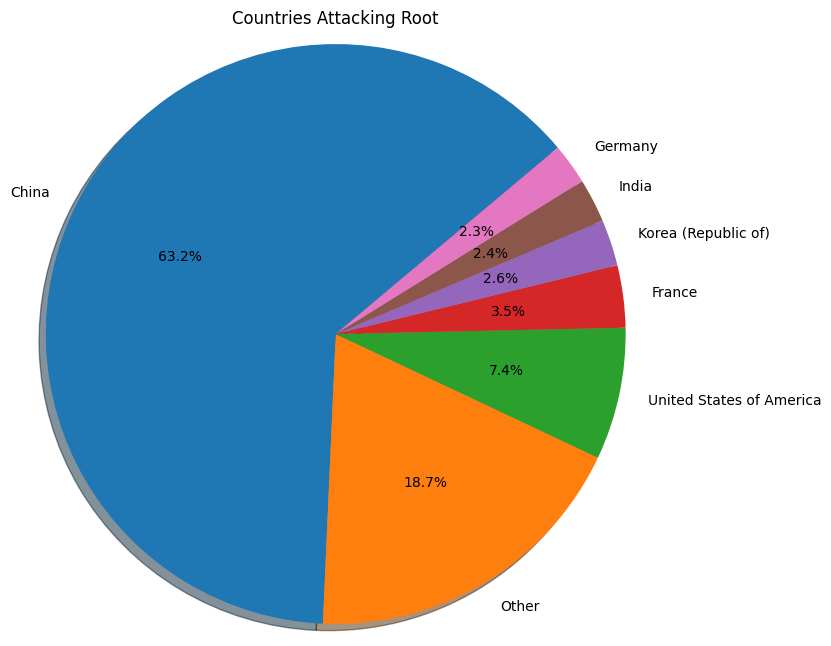

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8), dpi = 100)
plt.pie(occur, labels = cont, startangle = 40, shadow = True, radius = 1.2, autopct = '%1.1f%%')
plt.title("Countries Attacking Root")
plt.show()

In [140]:
print(len(nonRootLogs))

2192676


In [141]:
ncountries = []
for x in nonRootLogs:
    if x[0][2]!='':
        try:
            c = ipInfo(x[0][2])
        except:
            print("error " + repr(x[0][2]))
            print(x)
            if c in '-':
                print(x[0][2])
                print(x)
        ncountries.append((c, 1))

In [142]:
print(len(nonRootLogs))
nAttacksPerCountry = sc.parallelize(ncountries).groupByKey().mapValues(list).mapValues(lambda V: sum(V))
nAttacksPerCountry.takeOrdered(nAttacksPerCountry.count(), key = lambda x: -x[1])

2192676


[('China', 673076),
 ('United States of America', 223284),
 ('Viet Nam', 93044),
 ('India', 90954),
 ('France', 50410),
 ('Indonesia', 39679),
 ('Brazil', 37079),
 ('Singapore', 35339),
 ('Thailand', 34052),
 ('Germany', 32565),
 ('Korea (Republic of)', 26578),
 ('Hong Kong', 25777),
 ('Russian Federation', 23666),
 ('Netherlands', 18751),
 ('Mexico', 15654),
 ('United Kingdom of Great Britain and Northern Ireland', 14999),
 ('Canada', 14823),
 ('Turkey', 13457),
 ('Argentina', 9134),
 ('Japan', 8762),
 ('Ukraine', 8742),
 ('Pakistan', 8405),
 ('Colombia', 8165),
 ('Malaysia', 7011),
 ('Italy', 6739),
 ('Philippines', 4869),
 ('Taiwan (Province of China)', 4607),
 ('Poland', 4459),
 ('Venezuela (Bolivarian Republic of)', 4094),
 ('Sweden', 3587),
 ('Morocco', 3435),
 ('Nepal', 3411),
 ('Australia', 3321),
 ('Bangladesh', 3162),
 ('Spain', 3159),
 ('Saudi Arabia', 2980),
 ('Romania', 2913),
 ('Peru', 2835),
 ('Dominican Republic', 2745),
 ('Iran (Islamic Republic of)', 2666),
 ('Nigeria

In [143]:
def func(entry, l):
    p = float(entry[1]) / float(l)
    if p >= .02:
        return entry
    else:
        return ("Other", entry[1])

length = len(ncountries)
percNAPC = nAttacksPerCountry.map(lambda x: func(x, length)).groupByKey().mapValues(list).mapValues(lambda V: sum(V))

cont = []
occur = []
temp = percNAPC.sortBy(lambda x: -x[1]).collect()
for x in temp:
    cont.append(x[0])
    occur.append(x[1])
    
percNAPC.takeOrdered(percNAPC.count(), key = lambda x: -x[1])

[('China', 673076),
 ('Other', 351448),
 ('United States of America', 223284),
 ('Viet Nam', 93044),
 ('India', 90954),
 ('France', 50410),
 ('Indonesia', 39679),
 ('Brazil', 37079),
 ('Singapore', 35339),
 ('Thailand', 34052)]

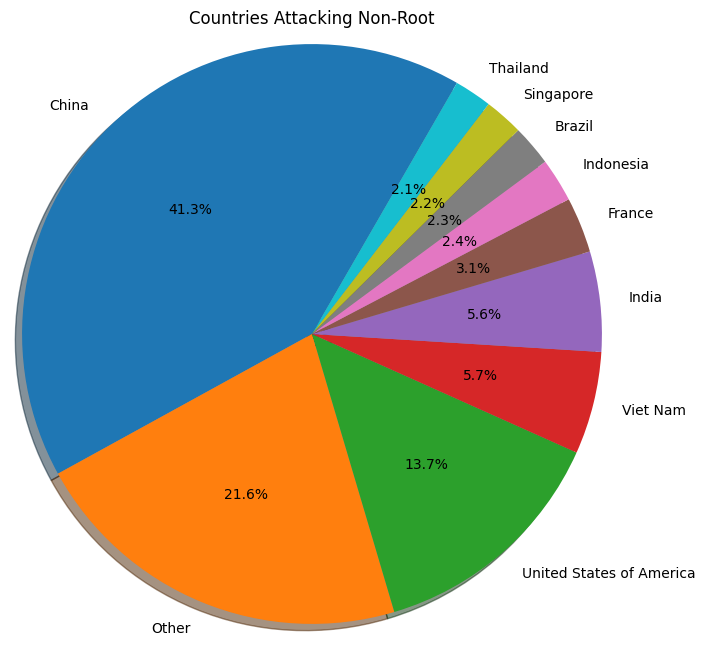

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8), dpi = 100)
plt.pie(occur, labels = cont, startangle = 60, shadow = True, radius = 1.2, autopct = '%1.1f%%')
plt.title("Countries Attacking Non-Root")
plt.show()

In [145]:
from datetime import date

def dateConvert(x):
    year = 0
    month = 0
    day = int(x[0][0][1])
    if x[0][0][0]=='Jan':
        month = 1
        year = 2021
    elif x[0][0][0]=='Dec':
        month = 12
        year = 2020
    else:
        month = 11
        year = 2020
    return date(year, month, day)

test = ((('Jan', '18', '06', '25', '09'), '29892', '103.71.77.78'),
  'Failed password for invalid user MikroTik from 103.71.77.78 port 63238 ssh2')
print(dateConvert(test))

2021-01-18


In [146]:
def sumValues(x, y):
    return (x + y)

attacks = rootLogs + nonRootLogs
attacksOnDates = sc.parallelize(attacks).map(lambda x: (dateConvert(x), 1)).reduceByKey(sumValues)
attacksOnDates.takeOrdered(attacksOnDates.count(), key = lambda x: -x[1])

[(datetime.date(2021, 1, 11), 121238),
 (datetime.date(2021, 1, 13), 109323),
 (datetime.date(2021, 1, 5), 103498),
 (datetime.date(2021, 1, 12), 103325),
 (datetime.date(2021, 1, 14), 94336),
 (datetime.date(2021, 1, 20), 92826),
 (datetime.date(2021, 1, 15), 90397),
 (datetime.date(2021, 1, 19), 89583),
 (datetime.date(2021, 1, 10), 86081),
 (datetime.date(2021, 1, 9), 84277),
 (datetime.date(2020, 12, 28), 80287),
 (datetime.date(2020, 12, 31), 80034),
 (datetime.date(2021, 1, 4), 79470),
 (datetime.date(2021, 1, 21), 79390),
 (datetime.date(2021, 1, 16), 79149),
 (datetime.date(2020, 12, 30), 77465),
 (datetime.date(2021, 1, 8), 73058),
 (datetime.date(2021, 1, 1), 72237),
 (datetime.date(2021, 1, 22), 71548),
 (datetime.date(2020, 12, 29), 71133),
 (datetime.date(2021, 1, 23), 71038),
 (datetime.date(2021, 1, 18), 70727),
 (datetime.date(2021, 1, 17), 68524),
 (datetime.date(2021, 1, 3), 63973),
 (datetime.date(2021, 1, 6), 62588),
 (datetime.date(2020, 12, 27), 61163),
 (datetime

In [147]:
coords = attacksOnDates.collect()

In [148]:
coords.sort()
coords

[(datetime.date(2020, 11, 23), 8952),
 (datetime.date(2020, 11, 24), 13382),
 (datetime.date(2020, 11, 25), 12921),
 (datetime.date(2020, 11, 26), 15382),
 (datetime.date(2020, 11, 27), 12979),
 (datetime.date(2020, 11, 28), 14441),
 (datetime.date(2020, 11, 29), 17602),
 (datetime.date(2020, 11, 30), 12989),
 (datetime.date(2020, 12, 1), 13844),
 (datetime.date(2020, 12, 2), 12891),
 (datetime.date(2020, 12, 3), 9782),
 (datetime.date(2020, 12, 4), 10158),
 (datetime.date(2020, 12, 5), 13558),
 (datetime.date(2020, 12, 6), 13485),
 (datetime.date(2020, 12, 7), 14167),
 (datetime.date(2020, 12, 8), 11394),
 (datetime.date(2020, 12, 9), 9599),
 (datetime.date(2020, 12, 10), 13471),
 (datetime.date(2020, 12, 11), 13167),
 (datetime.date(2020, 12, 12), 11051),
 (datetime.date(2020, 12, 13), 17924),
 (datetime.date(2020, 12, 14), 14913),
 (datetime.date(2020, 12, 15), 13490),
 (datetime.date(2020, 12, 16), 18053),
 (datetime.date(2020, 12, 17), 17921),
 (datetime.date(2020, 12, 18), 12692)

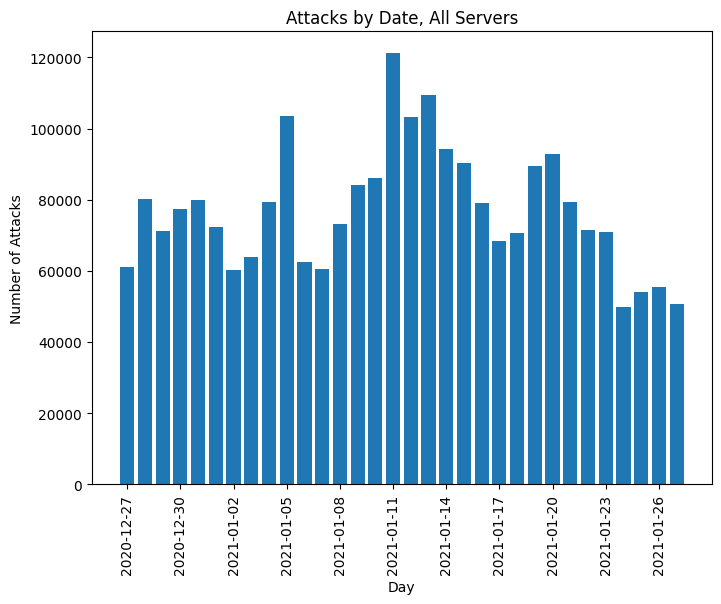

In [149]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

x = []
y = []
for i in range(31,len(coords)):
    x.append(coords[i][0])
    y.append(coords[i][1])

datemin = np.datetime64(x[0], 'D')
datemax = np.datetime64(x[-1], 'D') + np.timedelta64(1, 'D')

plt.figure(figsize=(8,6),dpi=100)
plt.bar(x,y)
plt.xticks(np.arange(datemin, datemax, np.timedelta64(3, 'D')),rotation='vertical')
plt.xlabel('Day') 
plt.ylabel('Number of Attacks') 
plt.title('Attacks by Date, All Servers') 
plt.show() 


#### Omitted logs from Taz before 12/27 so that above plot summarizes time period only for which there is data for all servers

In [150]:
attacksOnHours = sc.parallelize(attacks).map(lambda x: (x[0][0][2], 1)).reduceByKey(sumValues)
attacksOnHours.takeOrdered(attacksOnHours.count(), key = lambda x: -x[1])

[('02', 141499),
 ('05', 135374),
 ('03', 135177),
 ('00', 132098),
 ('20', 130635),
 ('01', 130093),
 ('06', 127966),
 ('07', 125238),
 ('04', 124028),
 ('21', 123033),
 ('22', 120574),
 ('23', 118945),
 ('17', 118539),
 ('16', 117636),
 ('15', 117575),
 ('18', 115559),
 ('14', 114288),
 ('19', 113958),
 ('13', 110614),
 ('10', 109670),
 ('11', 107155),
 ('09', 106181),
 ('12', 105757),
 ('08', 102143)]

In [151]:
coordsh = sorted(attacksOnHours.collect())

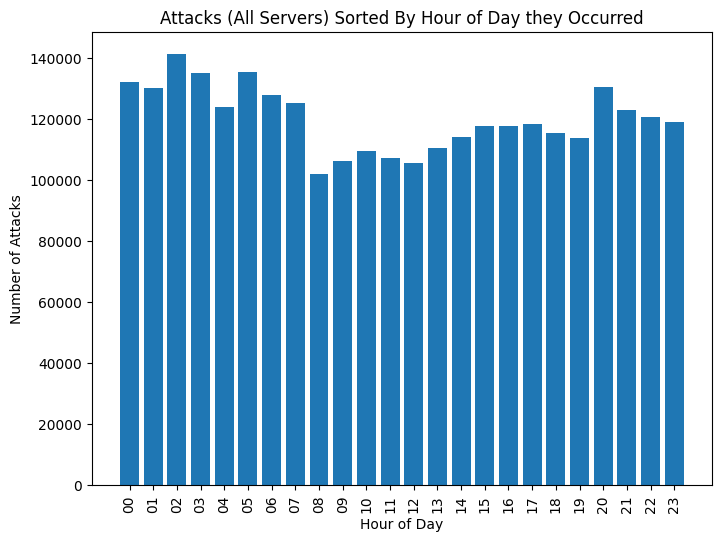

In [152]:
x = []
y = []
for i in range(len(coordsh)):
    x.append(coordsh[i][0])
    y.append(coordsh[i][1])

plt.figure(figsize=(8,6),dpi=100)
plt.bar(x,y)
plt.xticks(np.arange(0,24,1),rotation='vertical')
plt.xlabel('Hour of Day') 
plt.ylabel('Number of Attacks') 
plt.title('Attacks (All Servers) Sorted By Hour of Day they Occurred') 
plt.show() 


In [153]:
def weekConvert(x):
    year = 0
    month = 0
    day = int(x[0][0][1])
    if x[0][0][0]=='Jan':
        month = 1
        year = 2021
    elif x[0][0][0]=='Dec':
        month = 12
        year = 2020
    else:
        month = 11
        year = 2020
    dateobj = date(year, month, day)
    return dateobj.weekday()

In [154]:
attacksOnWeekdays = sc.parallelize(attacks).map(lambda x: (weekConvert(x), 1)).reduceByKey(sumValues)
attacksOnWeekdays.takeOrdered(attacksOnWeekdays.count(), key = lambda x: -x[1])

[(1, 486550),
 (0, 474642),
 (2, 459054),
 (6, 390538),
 (3, 370731),
 (4, 356236),
 (5, 345984)]

In [155]:
coordsw = sorted(attacksOnWeekdays.collect())

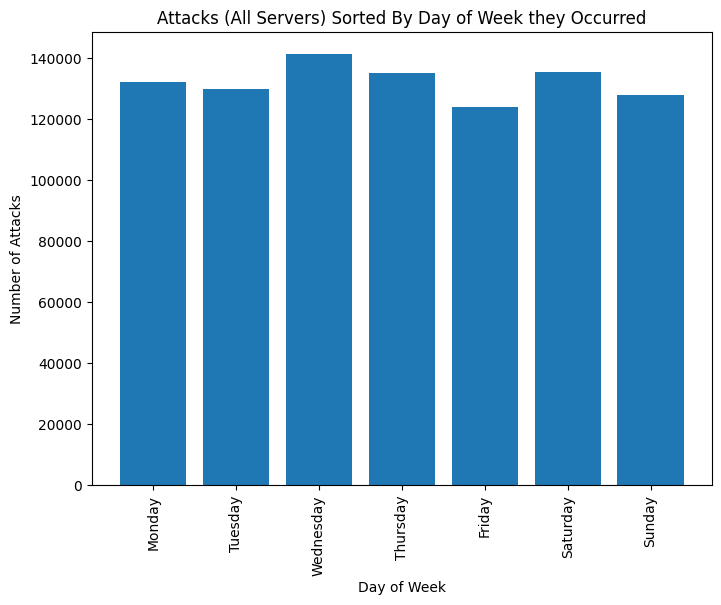

In [156]:
x = []
y = []
for i in range(len(coordsw)):
    x.append(coordsh[i][0])
    y.append(coordsh[i][1])

plt.figure(figsize=(8,6),dpi=100)
plt.bar(x,y)
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation='vertical')
plt.xlabel('Day of Week') 
plt.ylabel('Number of Attacks') 
plt.title('Attacks (All Servers) Sorted By Day of Week they Occurred') 
plt.show() 


### Check date ranges of servers

In [157]:
sshd_plots.count()

4924508

In [158]:
sshd.count()

4924508

In [159]:
   def splitLine(line):
    step1 = line.split("sshd", 1)
    month = step1[0].split(None)[0]
    day = step1[0].split(None)[1]
    server = step1[0].split(None)[3]
    session = step1[1].split(None)[0][1:-2]
    message = step1[1].split(None, 1)[1]
    import re
    regex = re.compile(r'\d+\.\d+\.\d+\.\d+')
    ipList = regex.findall(message)
    if len(ipList) == 1:
        return (((month, day), server, session, ipList[0]), message)
    else:
        return (((month, day), server, session, ""), message)

bonesdates =sshd_plots.map(lambda line: splitLine(line)).filter(lambda l: "bones" in l[0][1])
bonesdatesMap = bonesdates.map(lambda l: (l[0][0],1)).groupByKey().sortByKey().keys()
print(bonesdates.count())
bonesdatesMap.collect()

1966418


[('Dec', '27'),
 ('Dec', '28'),
 ('Dec', '29'),
 ('Dec', '30'),
 ('Dec', '31'),
 ('Jan', '1'),
 ('Jan', '10'),
 ('Jan', '11'),
 ('Jan', '12'),
 ('Jan', '13'),
 ('Jan', '14'),
 ('Jan', '15'),
 ('Jan', '16'),
 ('Jan', '17'),
 ('Jan', '18'),
 ('Jan', '19'),
 ('Jan', '2'),
 ('Jan', '20'),
 ('Jan', '21'),
 ('Jan', '22'),
 ('Jan', '23'),
 ('Jan', '24'),
 ('Jan', '25'),
 ('Jan', '26'),
 ('Jan', '27'),
 ('Jan', '3'),
 ('Jan', '4'),
 ('Jan', '5'),
 ('Jan', '6'),
 ('Jan', '7'),
 ('Jan', '8'),
 ('Jan', '9')]

In [160]:
   def splitLine(line):
    step1 = line.split("sshd", 1)
    month = step1[0].split(None)[0]
    day = step1[0].split(None)[1]
    server = step1[0].split(None)[3]
    session = step1[1].split(None)[0][1:-2]
    message = step1[1].split(None, 1)[1]
    import re
    regex = re.compile(r'\d+\.\d+\.\d+\.\d+')
    ipList = regex.findall(message)
    if len(ipList) == 1:
        return (((month, day), server, session, ipList[0]), message)
    else:
        return (((month, day), server, session, ""), message)

submittydates =sshd_plots.map(lambda line: splitLine(line)).filter(lambda l: "submitty" in l[0][1])
submittydatesMap = submittydates.map(lambda l: (l[0][0],1)).groupByKey().sortByKey().keys()
print(submittydates.count())
submittydatesMap.collect()

135322


[('Dec', '28'),
 ('Dec', '29'),
 ('Dec', '30'),
 ('Dec', '31'),
 ('Jan', '1'),
 ('Jan', '10'),
 ('Jan', '11'),
 ('Jan', '12'),
 ('Jan', '13'),
 ('Jan', '14'),
 ('Jan', '15'),
 ('Jan', '16'),
 ('Jan', '17'),
 ('Jan', '18'),
 ('Jan', '19'),
 ('Jan', '2'),
 ('Jan', '20'),
 ('Jan', '21'),
 ('Jan', '22'),
 ('Jan', '23'),
 ('Jan', '24'),
 ('Jan', '25'),
 ('Jan', '26'),
 ('Jan', '27'),
 ('Jan', '3'),
 ('Jan', '4'),
 ('Jan', '5'),
 ('Jan', '6'),
 ('Jan', '7'),
 ('Jan', '8'),
 ('Jan', '9')]

In [161]:
   def splitLine(line):
    step1 = line.split("sshd", 1)
    month = step1[0].split(None)[0]
    day = step1[0].split(None)[1]
    server = step1[0].split(None)[3]
    session = step1[1].split(None)[0][1:-2]
    message = step1[1].split(None, 1)[1]
    import re
    regex = re.compile(r'\d+\.\d+\.\d+\.\d+')
    ipList = regex.findall(message)
    if len(ipList) == 1:
        return (((month, day), server, session, ipList[0]), message)
    else:
        return (((month, day), server, session, ""), message)

tazdates =sshd_plots.map(lambda line: splitLine(line)).filter(lambda l: "taz" in l[0][1])
tazdatesMap = tazdates.map(lambda l: (l[0][0],1)).groupByKey().sortByKey().keys()
print(tazdates.count())
tazdatesMap.collect()

706695


[('Dec', '1'),
 ('Dec', '10'),
 ('Dec', '11'),
 ('Dec', '12'),
 ('Dec', '13'),
 ('Dec', '14'),
 ('Dec', '15'),
 ('Dec', '16'),
 ('Dec', '17'),
 ('Dec', '18'),
 ('Dec', '19'),
 ('Dec', '2'),
 ('Dec', '20'),
 ('Dec', '21'),
 ('Dec', '22'),
 ('Dec', '23'),
 ('Dec', '3'),
 ('Dec', '4'),
 ('Dec', '5'),
 ('Dec', '6'),
 ('Dec', '7'),
 ('Dec', '8'),
 ('Dec', '9'),
 ('Nov', '23'),
 ('Nov', '24'),
 ('Nov', '25'),
 ('Nov', '26'),
 ('Nov', '27'),
 ('Nov', '28'),
 ('Nov', '29'),
 ('Nov', '30')]

In [162]:
   def splitLine(line):
    step1 = line.split("sshd", 1)
    month = step1[0].split(None)[0]
    day = step1[0].split(None)[1]
    server = step1[0].split(None)[3]
    session = step1[1].split(None)[0][1:-2]
    message = step1[1].split(None, 1)[1]
    import re
    regex = re.compile(r'\d+\.\d+\.\d+\.\d+')
    ipList = regex.findall(message)
    if len(ipList) == 1:
        return (((month, day), server, session, ipList[0]), message)
    else:
        return (((month, day), server, session, ""), message)

roadrunnerdates =sshd_plots.map(lambda line: splitLine(line)).filter(lambda l: "roadrunner" in l[0][1])
roadrunnerdatesMap = roadrunnerdates.map(lambda l: (l[0][0],1)).groupByKey().sortByKey().keys()
print(roadrunnerdates.count())
roadrunnerdatesMap.collect()

2072254


[('Dec', '27'),
 ('Dec', '28'),
 ('Dec', '29'),
 ('Dec', '30'),
 ('Dec', '31'),
 ('Jan', '1'),
 ('Jan', '10'),
 ('Jan', '11'),
 ('Jan', '12'),
 ('Jan', '13'),
 ('Jan', '14'),
 ('Jan', '15'),
 ('Jan', '16'),
 ('Jan', '17'),
 ('Jan', '18'),
 ('Jan', '19'),
 ('Jan', '2'),
 ('Jan', '20'),
 ('Jan', '21'),
 ('Jan', '22'),
 ('Jan', '23'),
 ('Jan', '24'),
 ('Jan', '25'),
 ('Jan', '26'),
 ('Jan', '27'),
 ('Jan', '3'),
 ('Jan', '4'),
 ('Jan', '5'),
 ('Jan', '6'),
 ('Jan', '7'),
 ('Jan', '8'),
 ('Jan', '9')]

In [163]:
   def splitLine(line):
    step1 = line.split("sshd", 1)
    month = step1[0].split(None)[0]
    day = step1[0].split(None)[1]
    server = step1[0].split(None)[3]
    session = step1[1].split(None)[0][1:-2]
    message = step1[1].split(None, 1)[1]
    import re
    regex = re.compile(r'\d+\.\d+\.\d+\.\d+')
    ipList = regex.findall(message)
    if len(ipList) == 1:
        return (((month, day), server, session, ipList[0]), message)
    else:
        return (((month, day), server, session, ""), message)

coyotedates =sshd_plots.map(lambda line: splitLine(line)).filter(lambda l: "coyote" in l[0][1])
coyotedatesMap = coyotedates.map(lambda l: (l[0][0],1)).groupByKey().sortByKey().keys()
print(coyotedates.count())
coyotedatesMap.collect()

43819


[('Dec', '27'),
 ('Dec', '28'),
 ('Dec', '29'),
 ('Dec', '30'),
 ('Dec', '31'),
 ('Jan', '1'),
 ('Jan', '10'),
 ('Jan', '11'),
 ('Jan', '12'),
 ('Jan', '13'),
 ('Jan', '14'),
 ('Jan', '15'),
 ('Jan', '16'),
 ('Jan', '17'),
 ('Jan', '18'),
 ('Jan', '19'),
 ('Jan', '2'),
 ('Jan', '20'),
 ('Jan', '21'),
 ('Jan', '22'),
 ('Jan', '23'),
 ('Jan', '24'),
 ('Jan', '25'),
 ('Jan', '26'),
 ('Jan', '27'),
 ('Jan', '3'),
 ('Jan', '4'),
 ('Jan', '5'),
 ('Jan', '6'),
 ('Jan', '7'),
 ('Jan', '8'),
 ('Jan', '9')]

### All servers except Taz appear to have more or less the same date range ~ Dec 27 - Jan 27 - differing windows shouldn't be an issue